# Liver Disorders :

In [ ]:
### Download Depencies :

In [45]:
import os
required_packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn"
]

os.system("pip install --quiet " + " ".join(required_packages))


0

### Import essential libraries :

In [47]:
import os
import time
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, concat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_curve, auc, roc_auc_score, f1_score,mean_squared_error, r2_score, mean_absolute_error)
import warnings
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

### setup for save plots :

In [49]:
dirs = ['exploratory_plots', 'model_evaluation_plots']

def start():
    print("Setting up directories...")
    for directory in dirs:
        if not os.path.exists(directory):
            os.makedirs(directory)
    print("Setup complete.")
dirs = ['output', 'model_results']
for dir_name in dirs:
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

### Analyze data and cleaning :

## Load data :

In [50]:
def load_data():
    print("Loading and preparing the data...")
    try:
        data = read_csv("bupa.data", sep=',', header=None)
    except:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
        data = read_csv(url, sep=',', header=None)
    data.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
    data['id'] = range(1, len(data) + 1)
    print(f"Dataset loaded: {data.shape[0]} rows and {data.shape[1]} columns")
    return data
def main():
    print("=== BUPA Liver Disorders Dataset Analysis ===")
    data = load_data()
if __name__=="__main__":
    main()

=== BUPA Liver Disorders Dataset Analysis ===
Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns


### size of data : 
`size :` 345 Rows 
`columns:` 9 columns 
`{id,mvc,alkphos,sgpt,sgot,gammat,drinks,selector}`

### remove remove highly correlated feature :

Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns

Feature correlation:
              mcv   alkphos      sgpt      sgot   gammagt    drinks
mcv      1.000000  0.044103  0.147695  0.187765  0.222314  0.312680
alkphos  0.044103  1.000000  0.076208  0.146057  0.133140  0.100796
sgpt     0.147695  0.076208  1.000000  0.739675  0.503435  0.206848
sgot     0.187765  0.146057  0.739675  1.000000  0.527626  0.279588
gammagt  0.222314  0.133140  0.503435  0.527626  1.000000  0.341224
drinks   0.312680  0.100796  0.206848  0.279588  0.341224  1.000000

=== Removing Highly Correlated Features ===
Found 1 highly correlated feature pairs (>0.7):
  sgpt and sgot: 0.7397
Features to be removed: ['sgot']
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']
Cleaned dataset saved as 'bupa_cleaned.csv'
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']

Cleaned dataset preview:
   mcv  alkphos  sgpt  gammagt  drinks  selector  id
0   85       92    45       31     0.0  

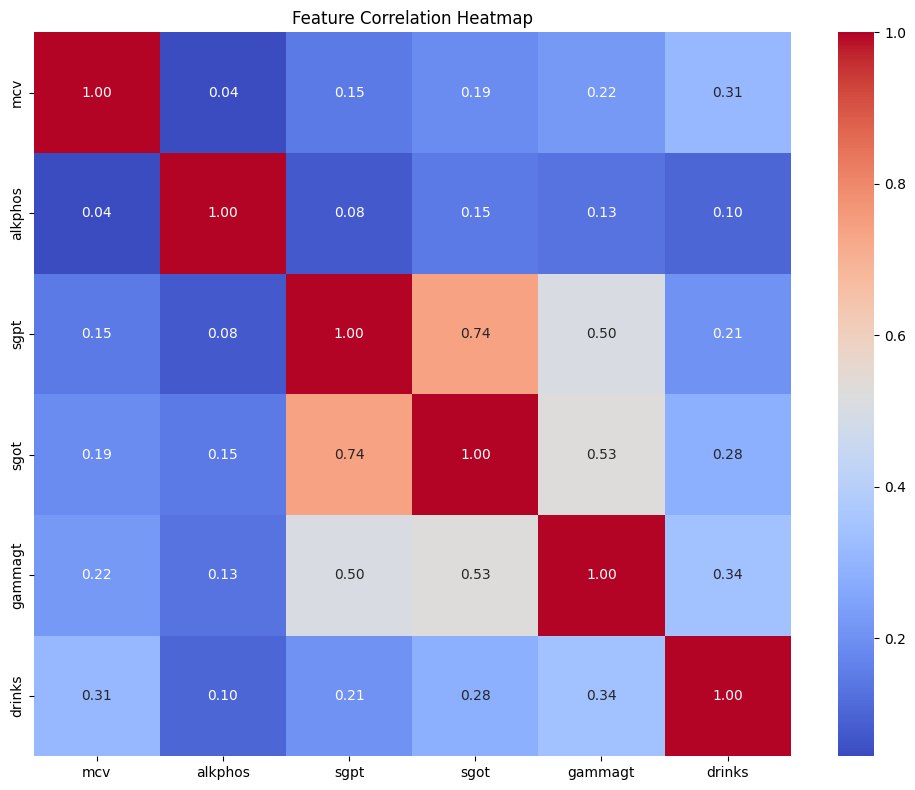

In [51]:
def remove_highly_correlated_features(data, threshold=0.7):

    print("\n=== Removing Highly Correlated Features ===")
    data_copy = data.copy()
    original_features = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']
    corr_matrix = data_copy[original_features].corr().abs()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    features_to_drop = []
    if high_corr_pairs:
        print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (>{threshold}):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} and {feat2}: {corr:.4f}")
        for feat1, feat2, _ in high_corr_pairs:
            if feat2 not in features_to_drop:
                features_to_drop.append(feat2)
        print(f"Features to be removed: {features_to_drop}")
        data_copy.drop(columns=features_to_drop, inplace=True)
    else:
        print(f"No feature pairs with correlation above {threshold} found.")
    remaining_features = [f for f in original_features if f not in features_to_drop]
    print(f"Remaining features: {remaining_features}")
    
    return data_copy, remaining_features
def main():
    data= load_data()
    print("\nFeature correlation:")
    correlation = data[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']].corr()
    print(correlation)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.savefig(f'{dirs[0]}/correlation_heatmap.png')
    data, remaining_features = remove_highly_correlated_features(data)
    data.to_csv('bupa_cleaned.csv', index=False)
    print("Cleaned dataset saved as 'bupa_cleaned.csv'")
    print(f"Remaining features: {remaining_features}")
    print("\nCleaned dataset preview:")
    print(data.head())
if __name__ == "__main__":
    main()



### We find that sgot has big correlation with sgpt (0,73) so we remove it

## selection feature :

Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns

=== Removing Highly Correlated Features ===
Found 1 highly correlated feature pairs (>0.7):
  sgpt and sgot: 0.7397
Features to be removed: ['sgot']
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']

=== Comparing Feature Selection Methods ===

Evaluating method: random_forest

=== Detecting Important Features using Random Forest ===
Using RandomForestRegressor for regression task

Feature importance ranking:
  gammagt: 0.3071
  alkphos: 0.2492
  sgpt: 0.2306
  mcv: 0.2131

Evaluating method: mutual_info

=== Detecting Important Features using Mutual Info ===
Using mutual_info_regression for regression task

Feature importance ranking:
  gammagt: 0.1143
  sgpt: 0.0551
  mcv: 0.0495
  alkphos: 0.0000

Evaluating method: lasso

=== Detecting Important Features using Lasso ===
Using Lasso Regression for feature selection

Feature importance ranking:
  gammagt: 0.8691
  mcv: 0.8155
  alkphos: 0.1660
  sgpt: 0

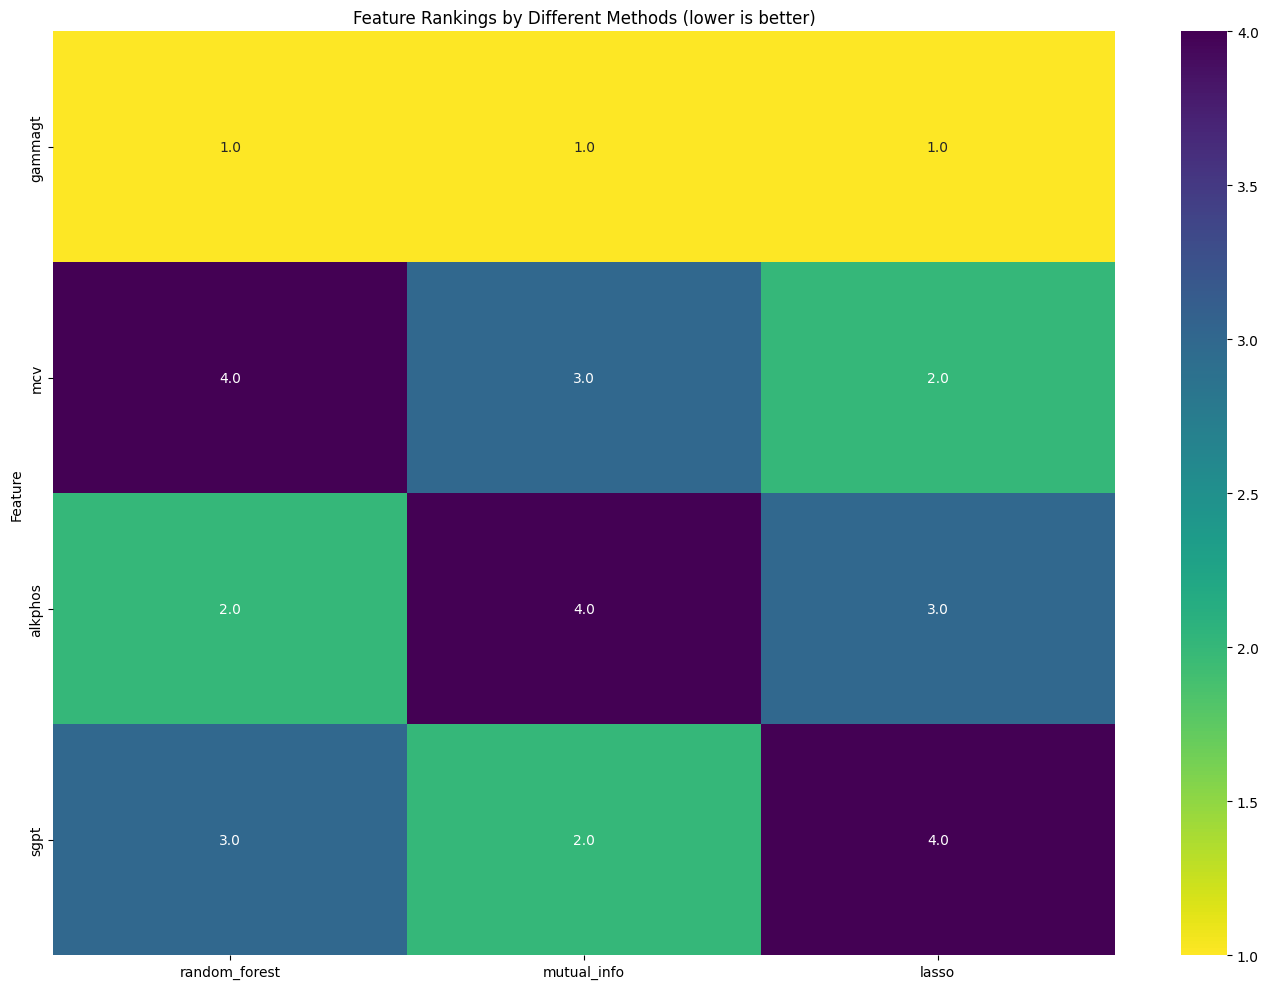

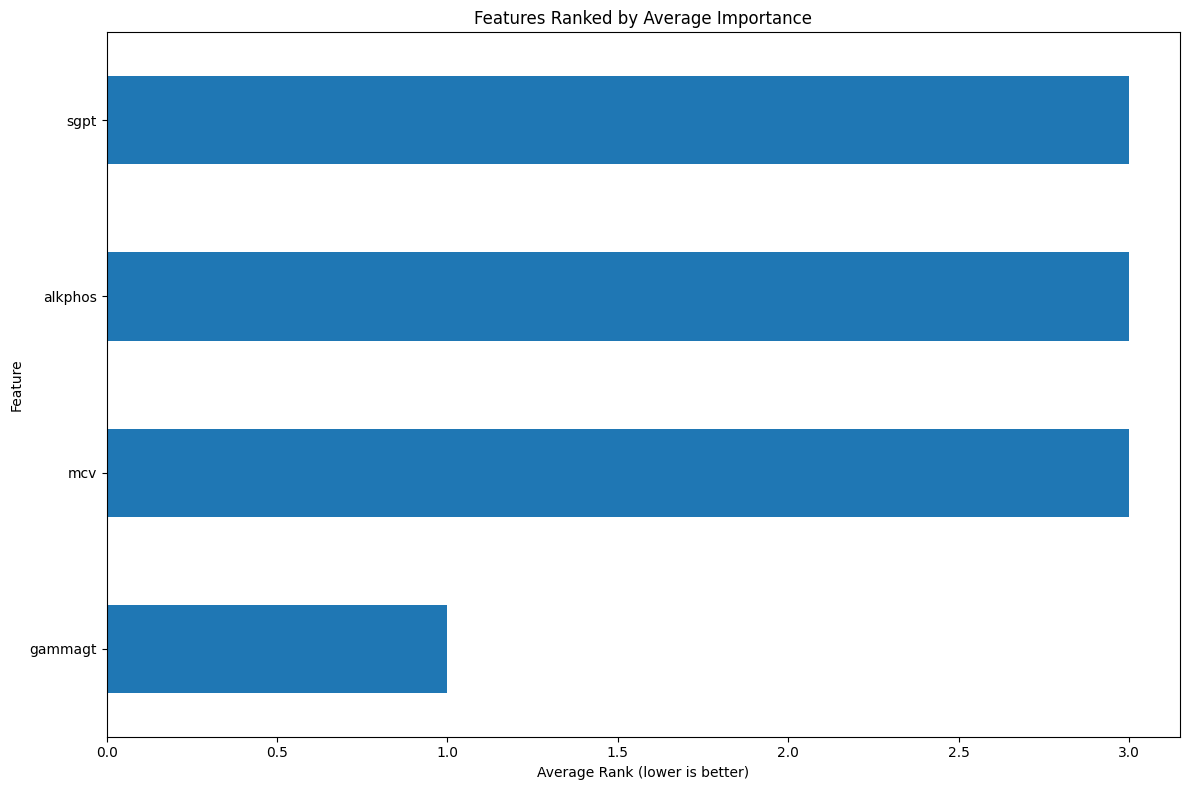

In [52]:

def detect_important_features(X, y, method='random_forest', k=None, visualize=True):
    print(f"\n=== Detecting Important Features using {method.replace('_', ' ').title()} ===")
    feature_names = X.columns.tolist()
    if method == 'random_forest':
        from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
        is_classification = len(np.unique(y)) <= 10  # Simple heuristic
        if is_classification:
            print("Using RandomForestClassifier for classification task")
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:
            print("Using RandomForestRegressor for regression task")
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        importances = model.feature_importances_
    elif method == 'mutual_info':
        if len(np.unique(y)) <= 10: 
            from sklearn.feature_selection import mutual_info_classif
            print("Using mutual_info_classif for classification task")
            importances = mutual_info_classif(X, y, random_state=42)
        else:
            from sklearn.feature_selection import mutual_info_regression
            print("Using mutual_info_regression for regression task")
            importances = mutual_info_regression(X, y, random_state=42)
    elif method == 'recursive':
        from sklearn.feature_selection import RFECV
        from sklearn.linear_model import LogisticRegression, LinearRegression
        if len(np.unique(y)) <= 10:
            print("Using Recursive Feature Elimination with LogisticRegression")
            estimator = LogisticRegression(max_iter=1000, random_state=42)
        else: 
            print("Using Recursive Feature Elimination with LinearRegression")
            estimator = LinearRegression()
        selector = RFECV(estimator, step=1, cv=5)
        selector.fit(X, y)
        importances = selector.ranking_
        importances = np.max(importances) - importances + 1
    elif method == 'lasso':
        from sklearn.linear_model import Lasso
        from sklearn.preprocessing import StandardScaler
        print("Using Lasso Regression for feature selection")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        lasso = Lasso(alpha=0.01, random_state=42)
        lasso.fit(X_scaled, y)
        importances = np.abs(lasso.coef_)
    else:
        raise ValueError(f"Unknown method: {method}")
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    print("\nFeature importance ranking:")
    for i, row in feature_importance.iterrows():
        print(f"  {row['Feature']}: {row['Importance']:.4f}")
    if visualize:
        plt.figure(figsize=(12, 8))
        plt.barh(feature_importance['Feature'], feature_importance['Importance'])
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance using {method.replace("_", " ").title()}')
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/feature_importance_{method}.png')
    if k is not None:
        k = min(k, len(feature_names))
        top_features = feature_importance['Feature'].tolist()[:k]
        print(f"\nTop {k} features: {top_features}")
        return top_features
    return feature_importance['Feature'].tolist()

def compare_feature_selection_methods(X, y, methods=None, visualize=True):
    if methods is None:
        methods = ['random_forest', 'mutual_info', 'lasso']
    print("\n=== Comparing Feature Selection Methods ===")
    results = {}
    all_rankings = []
    for method in methods:
        print(f"\nEvaluating method: {method}")
        feature_importance = pd.DataFrame({
            'Feature': X.columns.tolist(),
            'Importance': [0] * len(X.columns)
        })
        try:
            features_ranked = detect_important_features(X, y, method=method, visualize=False)
            ranks = {}
            for rank, feature in enumerate(features_ranked):
                ranks[feature] = rank + 1
            for i, feature in enumerate(X.columns):
                if feature in ranks:
                    feature_importance.loc[i, 'Importance'] = ranks[feature]
            results[method] = features_ranked
            all_rankings.append(feature_importance.set_index('Feature')['Importance'].rename(method))
        except Exception as e:
            print(f"Error with method {method}: {e}")
    if all_rankings:
        combined_rankings = pd.concat(all_rankings, axis=1)
        combined_rankings['Average Rank'] = combined_rankings.mean(axis=1)
        combined_rankings = combined_rankings.sort_values('Average Rank')
        print("\nCombined feature rankings (lower is better):")
        print(combined_rankings)
        if visualize :
            plt.figure(figsize=(14, 10))
            sns.heatmap(combined_rankings.drop('Average Rank', axis=1), 
                      annot=True, cmap='viridis_r', fmt='.1f')
            plt.title('Feature Rankings by Different Methods (lower is better)')
            plt.tight_layout()
            plt.savefig(f'{dirs[0]}/feature_selection_comparison_heatmap.png')
            plt.figure(figsize=(12, 8))
            combined_rankings['Average Rank'].sort_values().plot(kind='barh')
            plt.xlabel('Average Rank (lower is better)')
            plt.ylabel('Feature')
            plt.title('Features Ranked by Average Importance')
            plt.tight_layout()
            plt.savefig(f'{dirs[0]}/average_feature_ranking.png')
        return results, combined_rankings
    return results, None
def main() -> None:
    data = load_data()
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    data = remove_highly_correlated_features(data, threshold=0.7)
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    X = data.drop(columns=['selector','id', 'drinks'])
    y = data['drinks']
    results, combined_rankings = compare_feature_selection_methods(X, y)
    combined_rankings.to_csv(f'{dirs[0]}/feature_selection_results.csv')
    print("\nFeature selection results saved.")
    print("Results can be found in the 'results' directory.")
    print("=== Feature Selection and Comparison Completed ===")

if __name__ == "__main__":
    main()

### we find thta gammat is most contribute feature after mcv and alkphos and sgot has same important

## clean data from outlier

Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns

=== Removing Highly Correlated Features ===
Found 1 highly correlated feature pairs (>0.7):
  sgpt and sgot: 0.7397
Features to be removed: ['sgot']
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']

=== Comparing Feature Selection Methods ===

Evaluating method: random_forest

=== Detecting Important Features using Random Forest ===
Using RandomForestRegressor for regression task

Feature importance ranking:
  gammagt: 0.3071
  alkphos: 0.2492
  sgpt: 0.2306
  mcv: 0.2131

Evaluating method: mutual_info

=== Detecting Important Features using Mutual Info ===
Using mutual_info_regression for regression task

Feature importance ranking:
  gammagt: 0.1143
  sgpt: 0.0551
  mcv: 0.0495
  alkphos: 0.0000

Evaluating method: lasso

=== Detecting Important Features using Lasso ===
Using Lasso Regression for feature selection

Feature importance ranking:
  gammagt: 0.8691
  mcv: 0.8155
  alkphos: 0.1660
  sgpt: 0

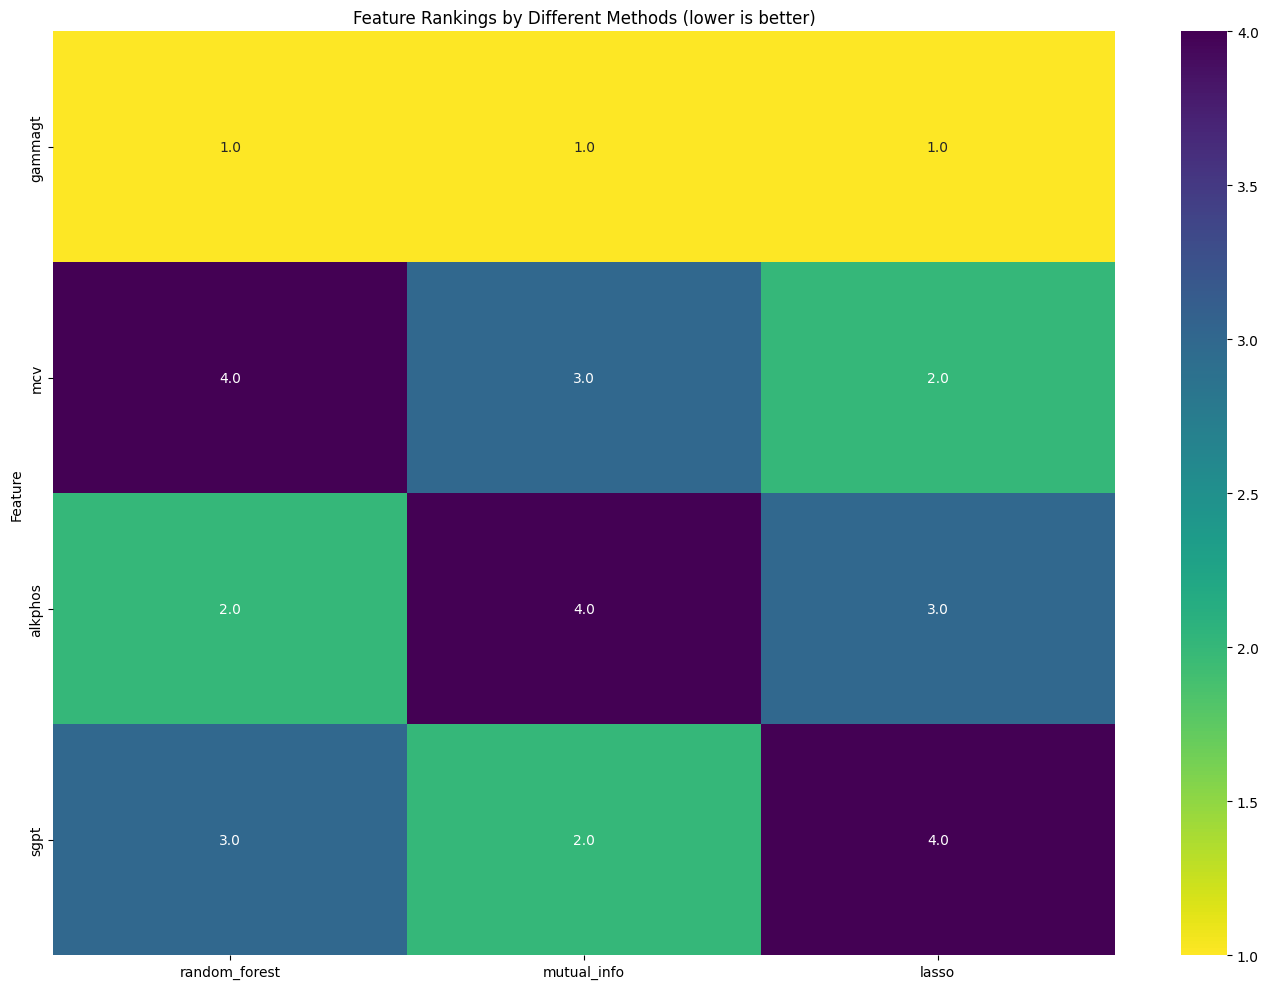

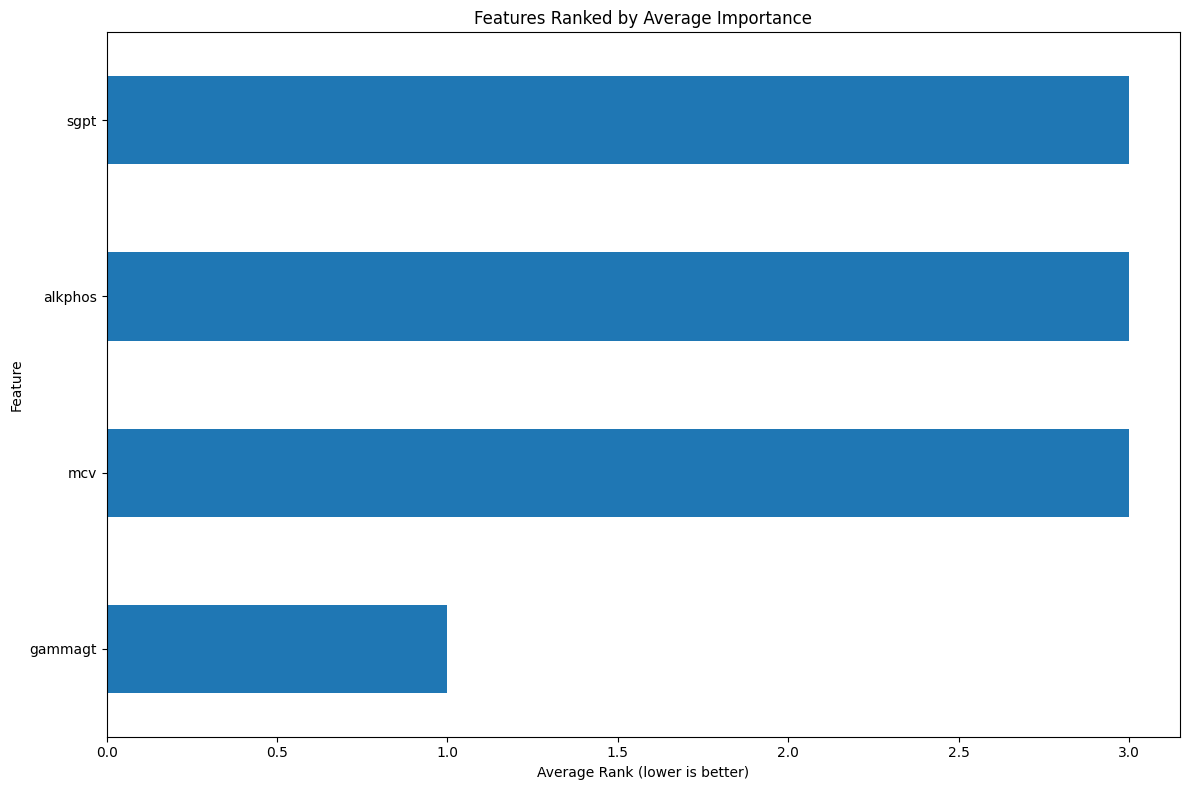

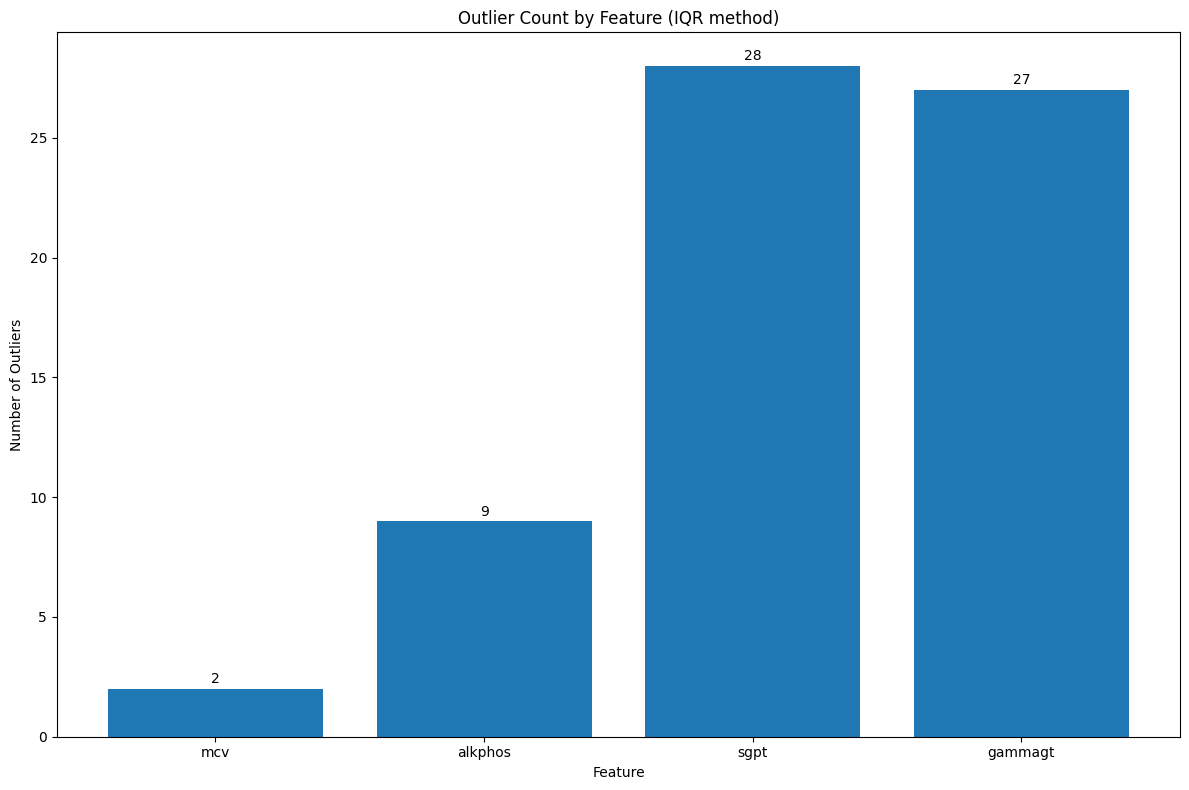

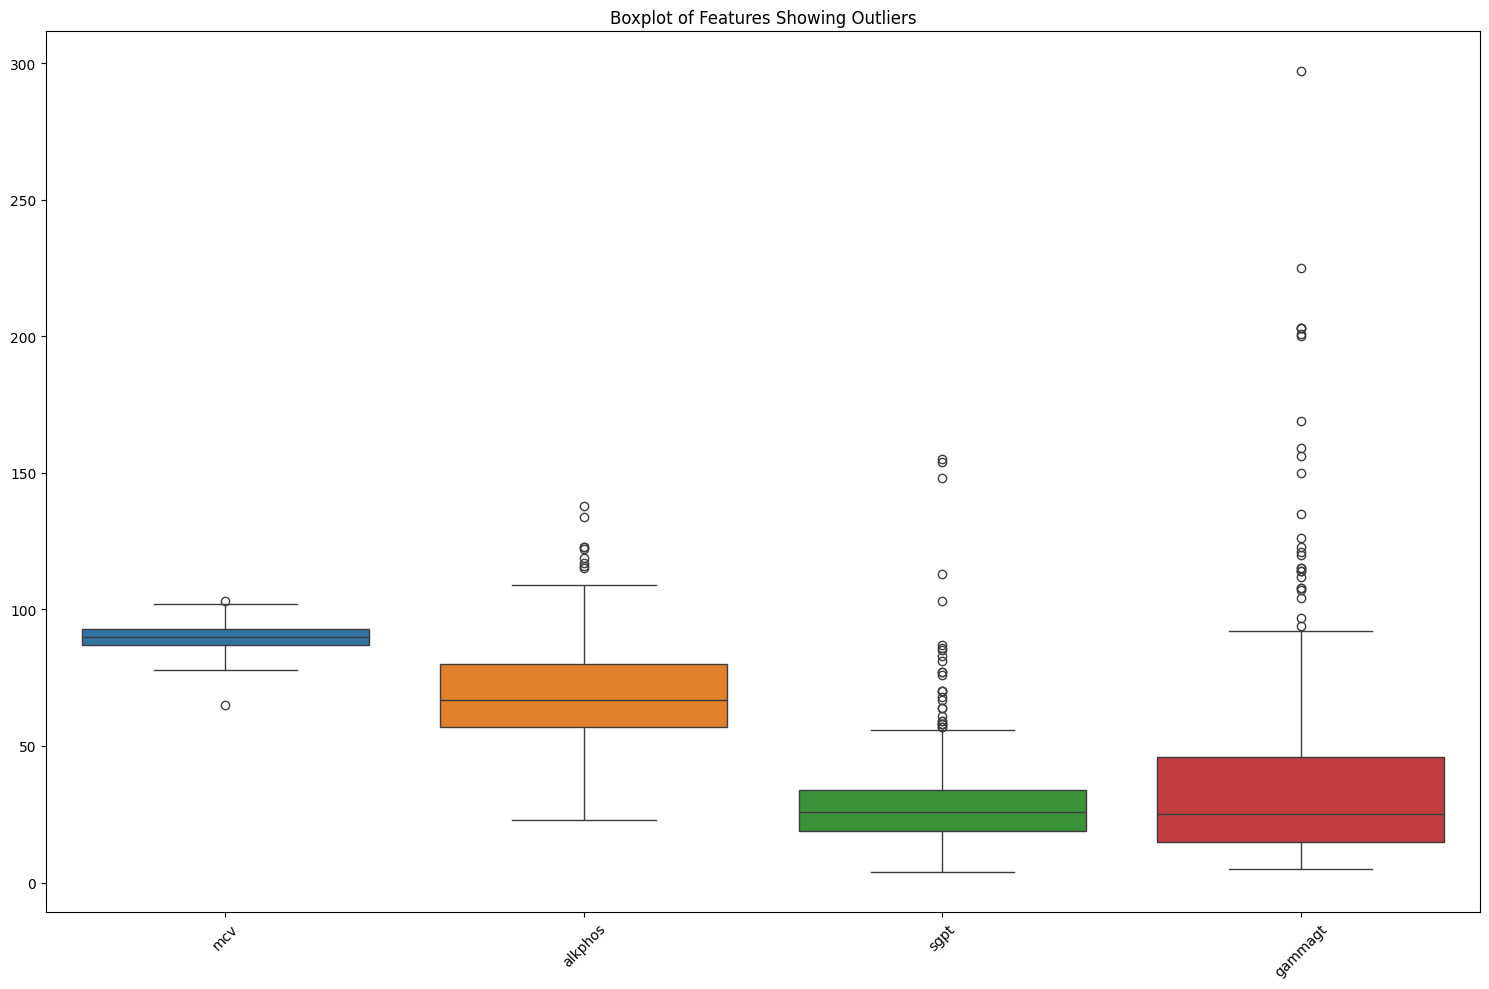

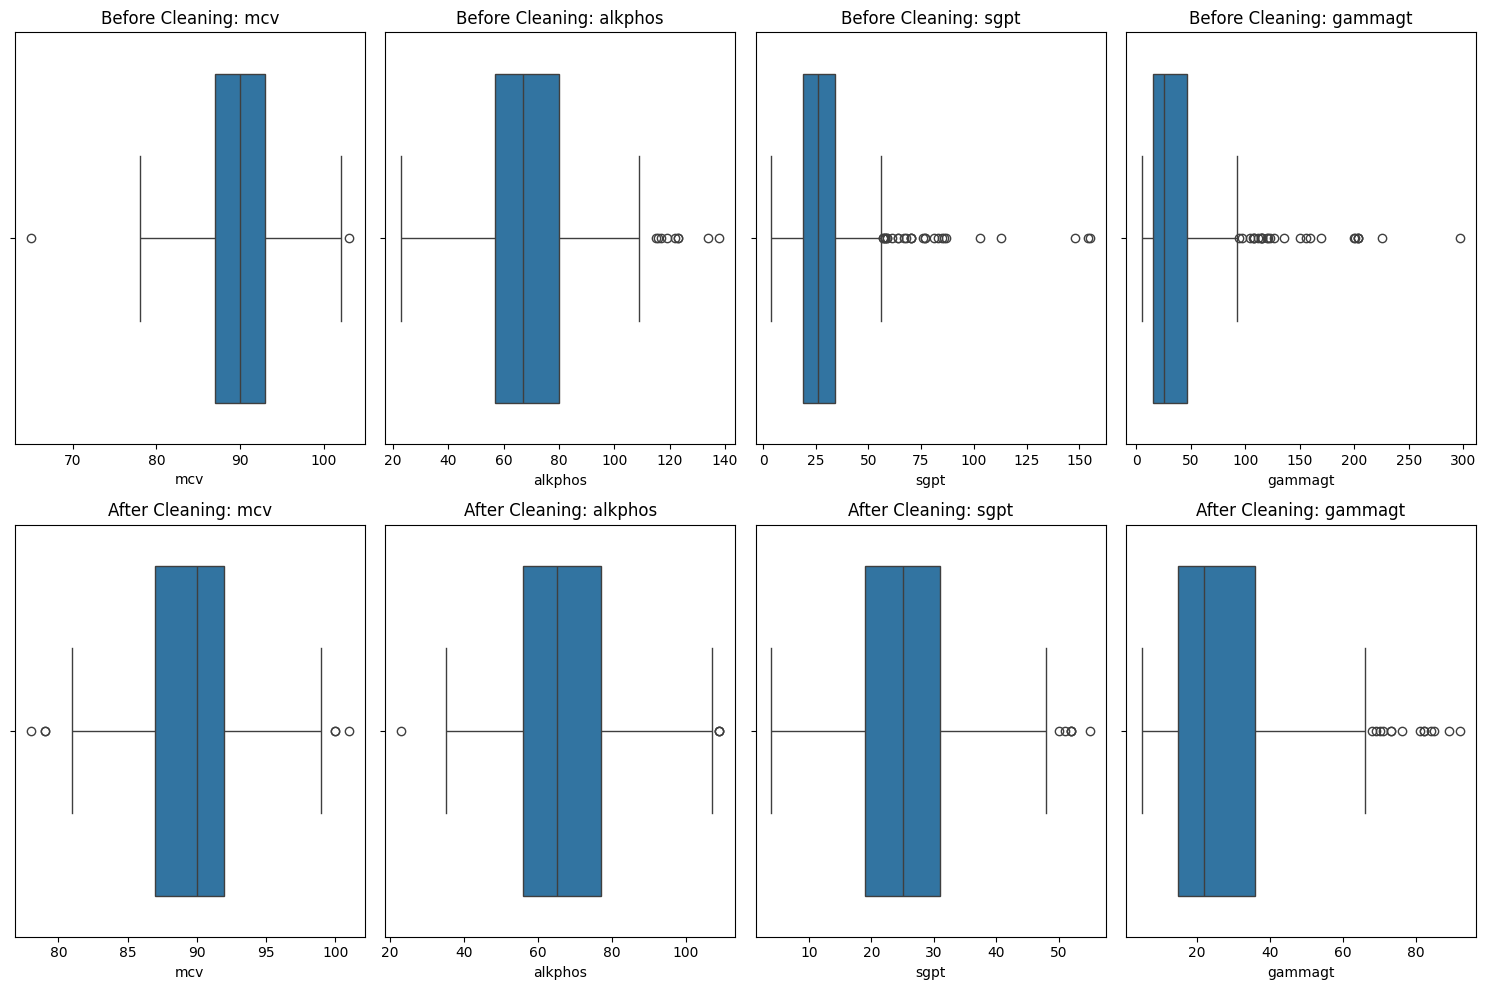

In [59]:
def detect_outliers(data, features, method='iqr', visualize=True, clean_outliers=False):
    print("\n=== Detecting Outliers ===")
    data_copy = data.copy()
    
    outlier_counts = {}
    outlier_indices = set()
    
    if method == 'iqr':
        print("Using IQR method for outlier detection")
        for feature in features:
            Q1 = data_copy[feature].quantile(0.25)
            Q3 = data_copy[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_col = f'{feature}_outlier'
            data_copy[outlier_col] = ((data_copy[feature] < lower_bound) | (data_copy[feature] > upper_bound)).astype(int)   
            outlier_count = data_copy[outlier_col].sum()
            outlier_counts[feature] = outlier_count
            
            # Add outlier indices to the set
            feature_outlier_indices = data_copy[data_copy[outlier_col] == 1].index
            outlier_indices.update(feature_outlier_indices)
            
            print(f"  {feature}: {outlier_count} outliers detected")
    elif method == 'zscore':
        print("Using Z-score method for outlier detection")
        for feature in features:
            mean = data_copy[feature].mean()
            std = data_copy[feature].std()
            outlier_col = f'{feature}_outlier'
            data_copy[outlier_col] = (abs(data_copy[feature] - mean) > 3 * std).astype(int)
            outlier_count = data_copy[outlier_col].sum()
            outlier_counts[feature] = outlier_count
            
            # Add outlier indices to the set
            feature_outlier_indices = data_copy[data_copy[outlier_col] == 1].index
            outlier_indices.update(feature_outlier_indices)
            
            print(f"  {feature}: {outlier_count} outliers detected")
    if visualize and outlier_counts:
        plt.figure(figsize=(12, 8))
        bars = plt.bar(outlier_counts.keys(), outlier_counts.values())
        plt.title(f'Outlier Count by Feature ({method.upper()} method)')
        plt.xlabel('Feature')
        plt.ylabel('Number of Outliers')
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    str(height), ha='center', va='bottom')
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/outlier_counts_{method}.png')
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=data_copy[features])
        plt.title('Boxplot of Features Showing Outliers')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/feature_boxplots.png')    
    
    outlier_cols = [f"{f}_outlier" for f in features]
    data_copy['has_any_outlier'] = data_copy[outlier_cols].sum(axis=1) > 0
    total_records_with_outliers = data_copy['has_any_outlier'].sum()
    print(f"Total records with at least one outlier: {total_records_with_outliers} ({(total_records_with_outliers/len(data_copy))*100:.2f}%)")
    
    # Clean outliers if requested
    if clean_outliers and total_records_with_outliers > 0:
        clean_data = data_copy[~data_copy['has_any_outlier']].copy()
        outlier_data = data_copy[data_copy['has_any_outlier']].copy()
        
        print(f"Removing {len(outlier_indices)} records with outliers...")
        print(f"Original data shape: {data_copy.shape}")
        print(f"Cleaned data shape: {clean_data.shape}")
        
        # For visualization of before/after cleaning (optional)
        if visualize:
            plt.figure(figsize=(15, 10))
            for i, feature in enumerate(features):
                plt.subplot(2, len(features), i+1)
                sns.boxplot(x=data_copy[feature])
                plt.title(f'Before Cleaning: {feature}')
                
                plt.subplot(2, len(features), i+len(features)+1)
                sns.boxplot(x=clean_data[feature])
                plt.title(f'After Cleaning: {feature}')
            
            plt.tight_layout()
            plt.savefig(f'{dirs[0]}/before_after_cleaning.png')
        
        # Return clean data without the outlier marker columns
        clean_data = clean_data.drop(columns=outlier_cols + ['has_any_outlier'])
        return clean_data
    
    return data_copy

def main() -> None:
    data = load_data()
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    data = remove_highly_correlated_features(data, threshold=0.7)
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    X = data.drop(columns=['selector','id', 'drinks'])
    y = data['drinks']
    results, combined_rankings = compare_feature_selection_methods(X, y)
    combined_rankings.to_csv(f'{dirs[0]}/feature_selection_results.csv')
    print("\nFeature selection results saved.")
    print("Results can be found in the 'results' directory.")
    print("=== Feature Selection and Comparison Completed ===")
    features= ['mcv', 'alkphos', 'sgpt', 'gammagt']
    
    # Updated to clean outliers
    X_clean = detect_outliers(X, features, method='iqr', visualize=True, clean_outliers=True)
    
    # Continue with the cleaned data for further analysis
    # For example: train_models(X_clean, y)

if __name__ == "__main__":
    main()

## scale data :

Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns

=== Removing Highly Correlated Features ===
Found 1 highly correlated feature pairs (>0.7):
  sgpt and sgot: 0.7397
Features to be removed: ['sgot']
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']

=== Comparing Feature Selection Methods ===

Evaluating method: random_forest

=== Detecting Important Features using Random Forest ===
Using RandomForestRegressor for regression task

Feature importance ranking:
  gammagt: 0.3071
  alkphos: 0.2492
  sgpt: 0.2306
  mcv: 0.2131

Evaluating method: mutual_info

=== Detecting Important Features using Mutual Info ===
Using mutual_info_regression for regression task

Feature importance ranking:
  gammagt: 0.1143
  sgpt: 0.0551
  mcv: 0.0495
  alkphos: 0.0000

Evaluating method: lasso

=== Detecting Important Features using Lasso ===
Using Lasso Regression for feature selection

Feature importance ranking:
  gammagt: 0.8691
  mcv: 0.8155
  alkphos: 0.1660
  sgpt: 0

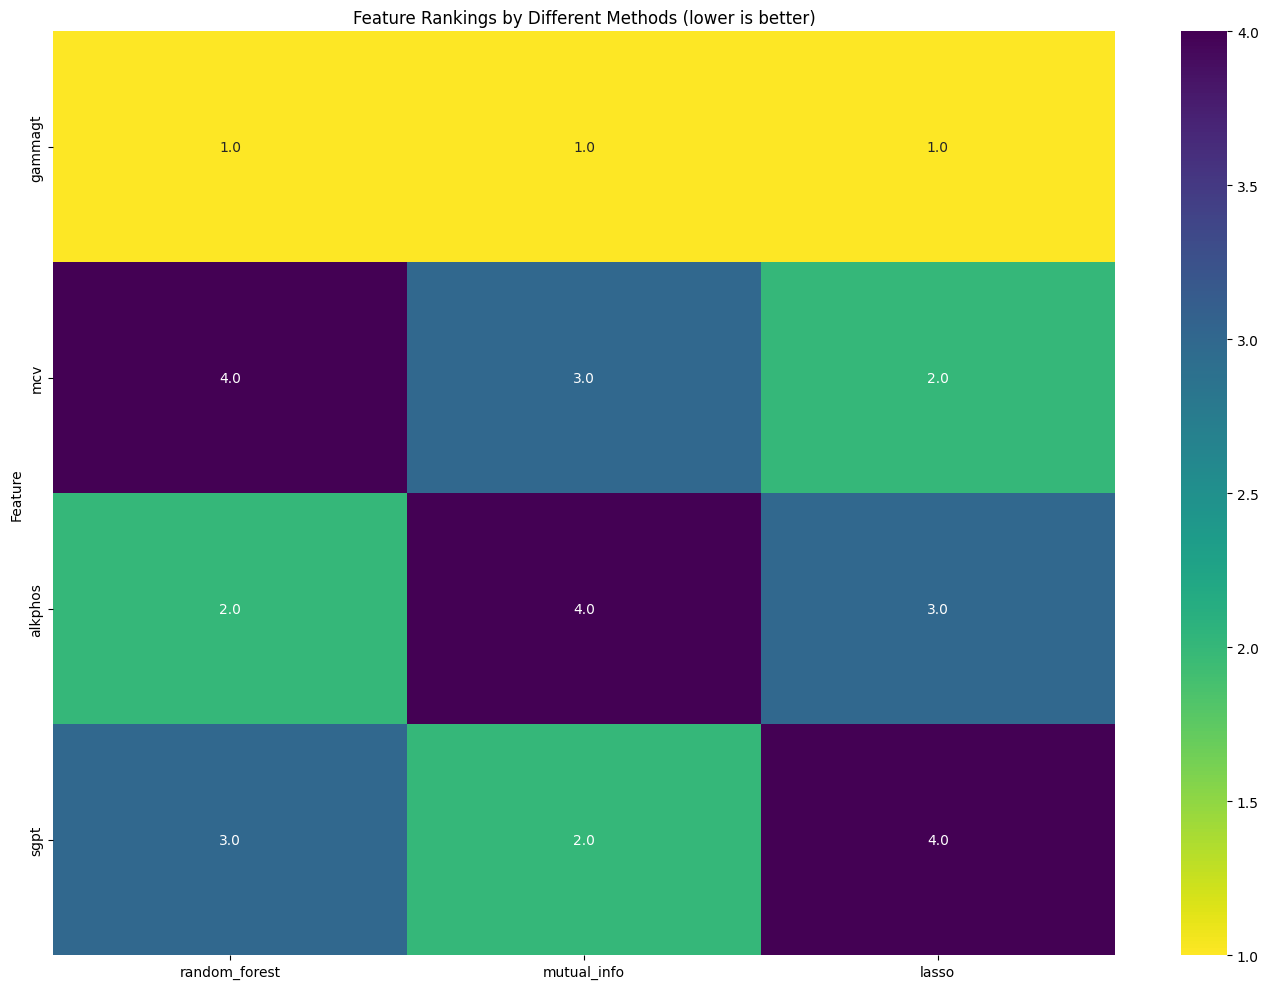

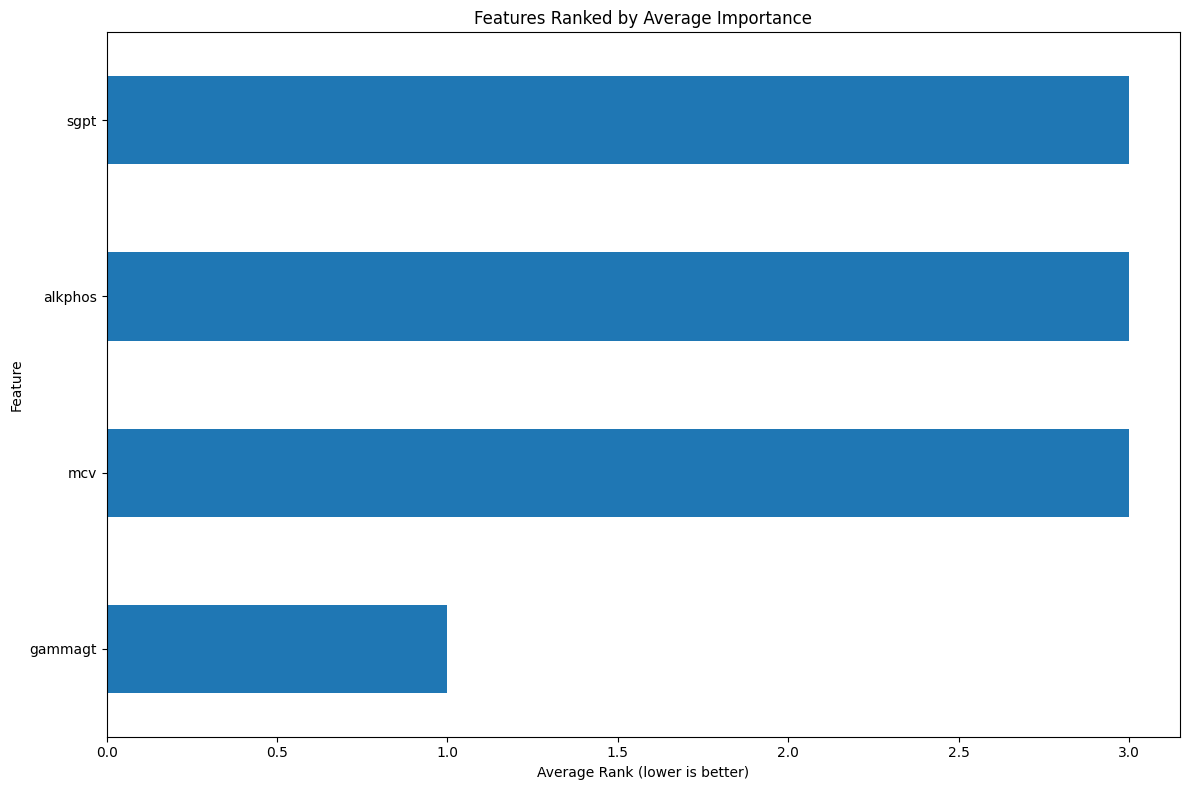

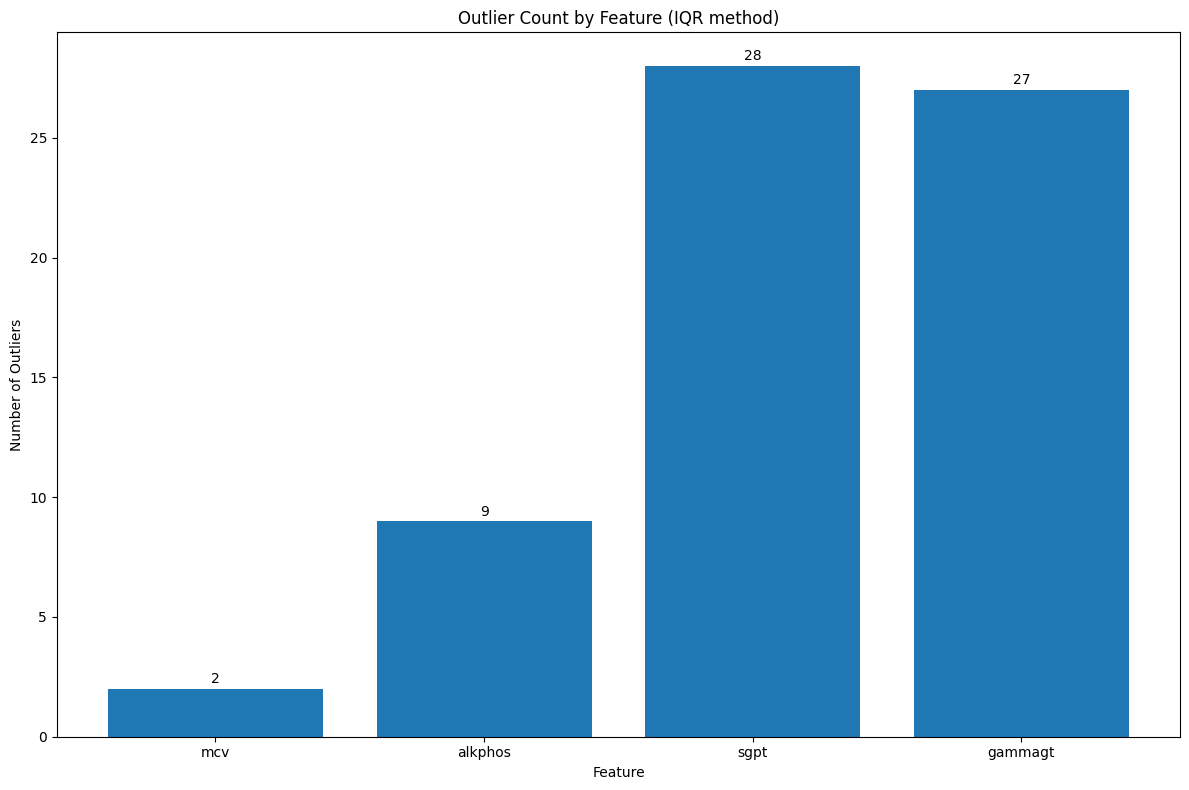

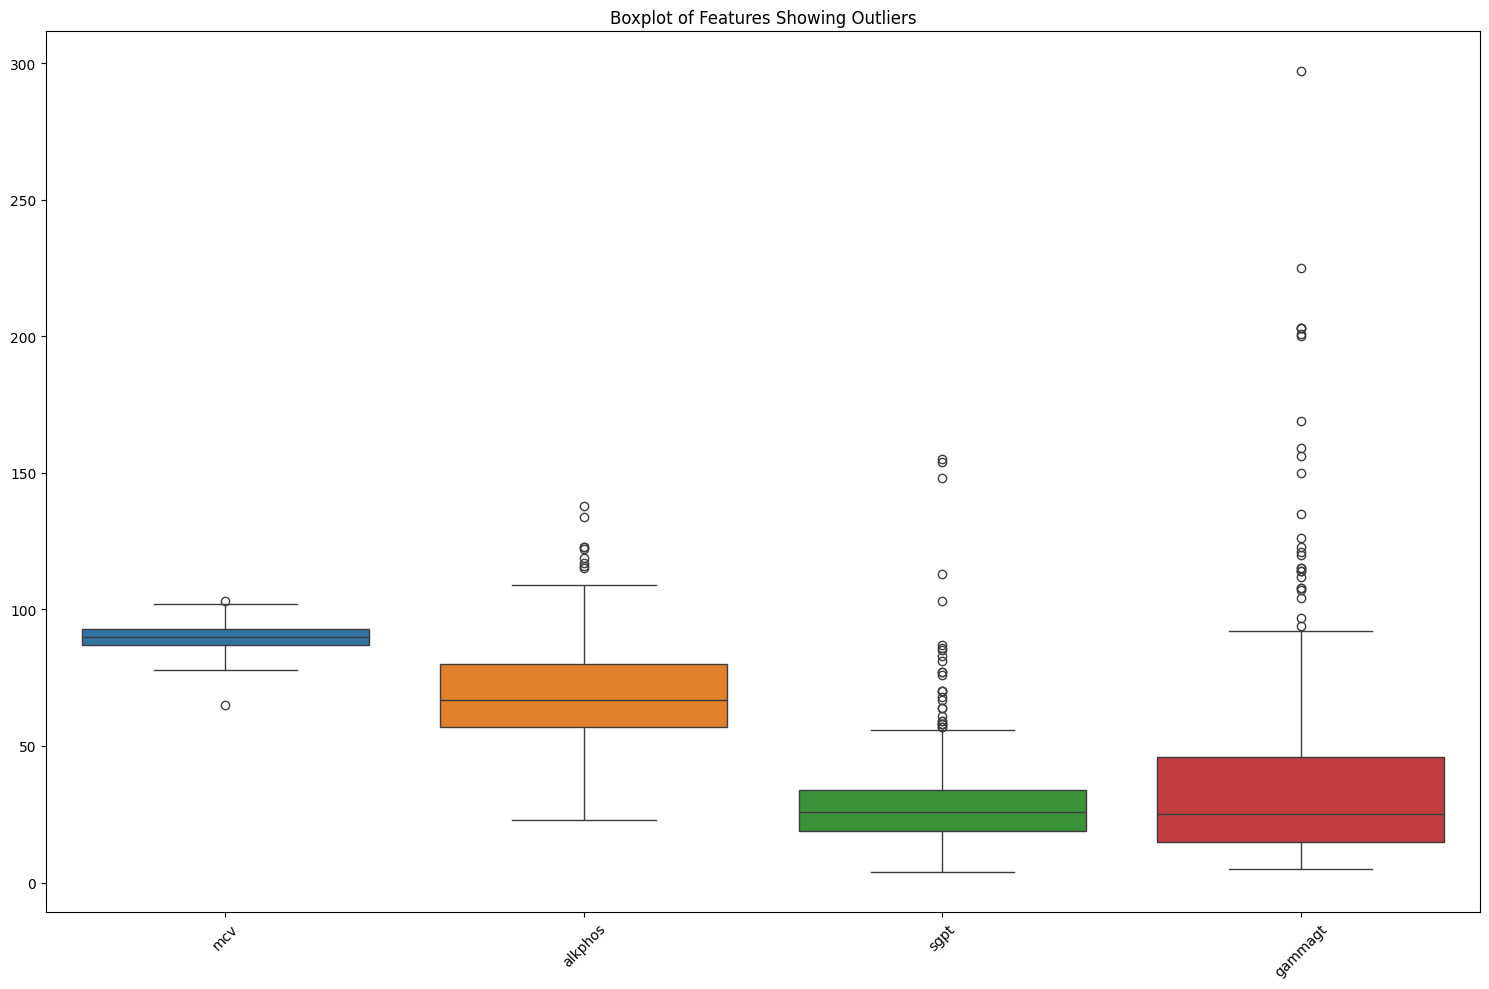

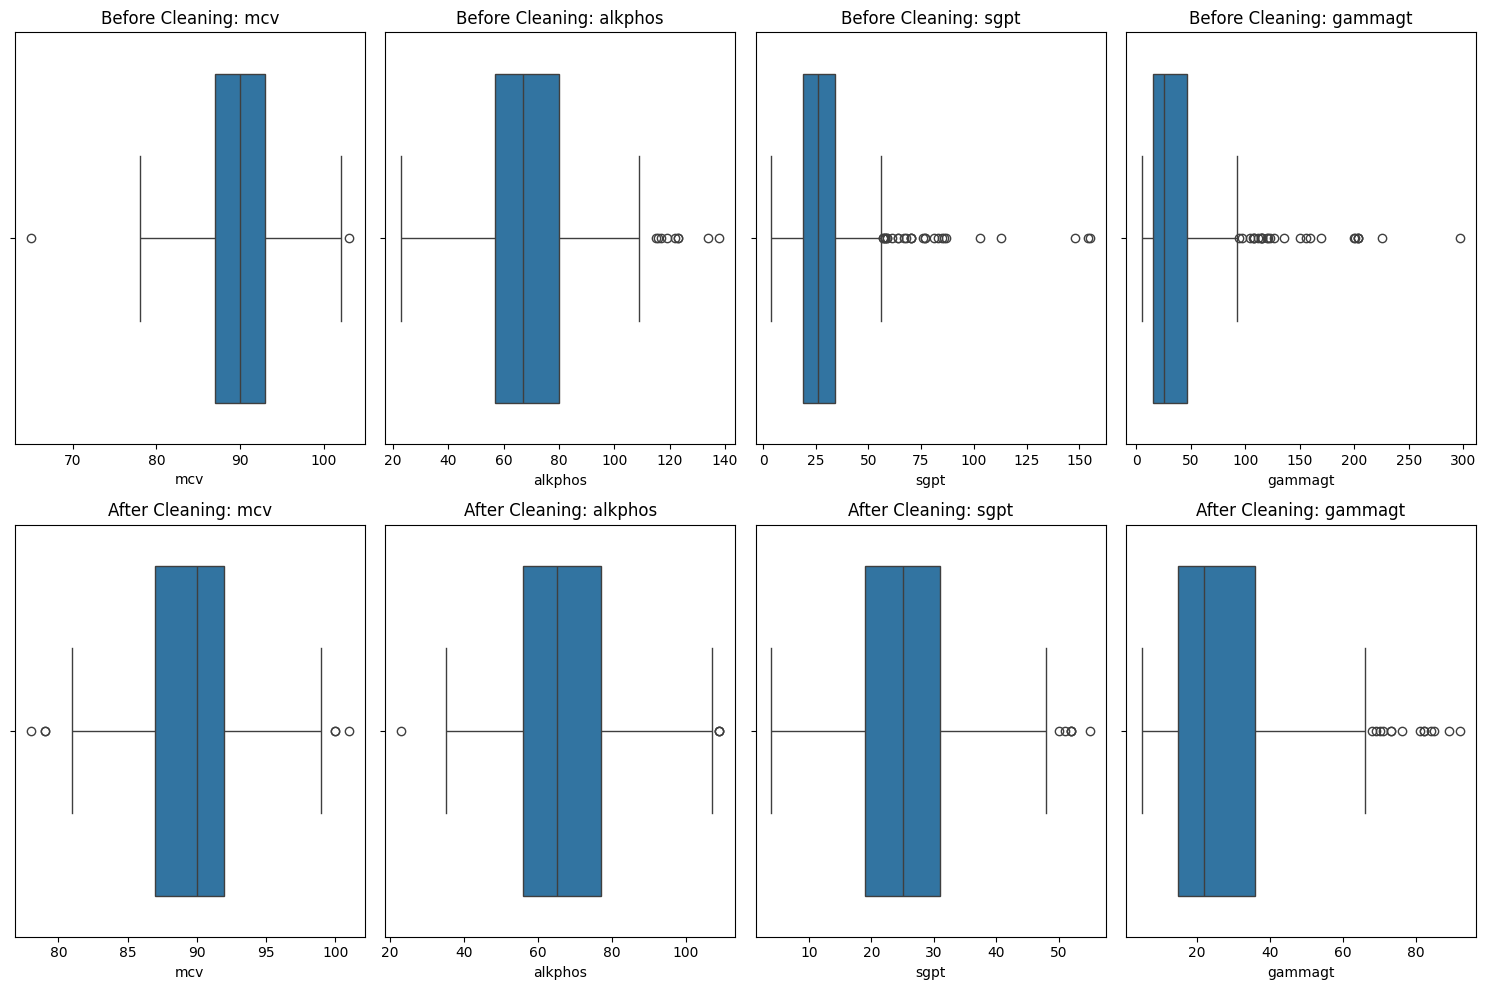

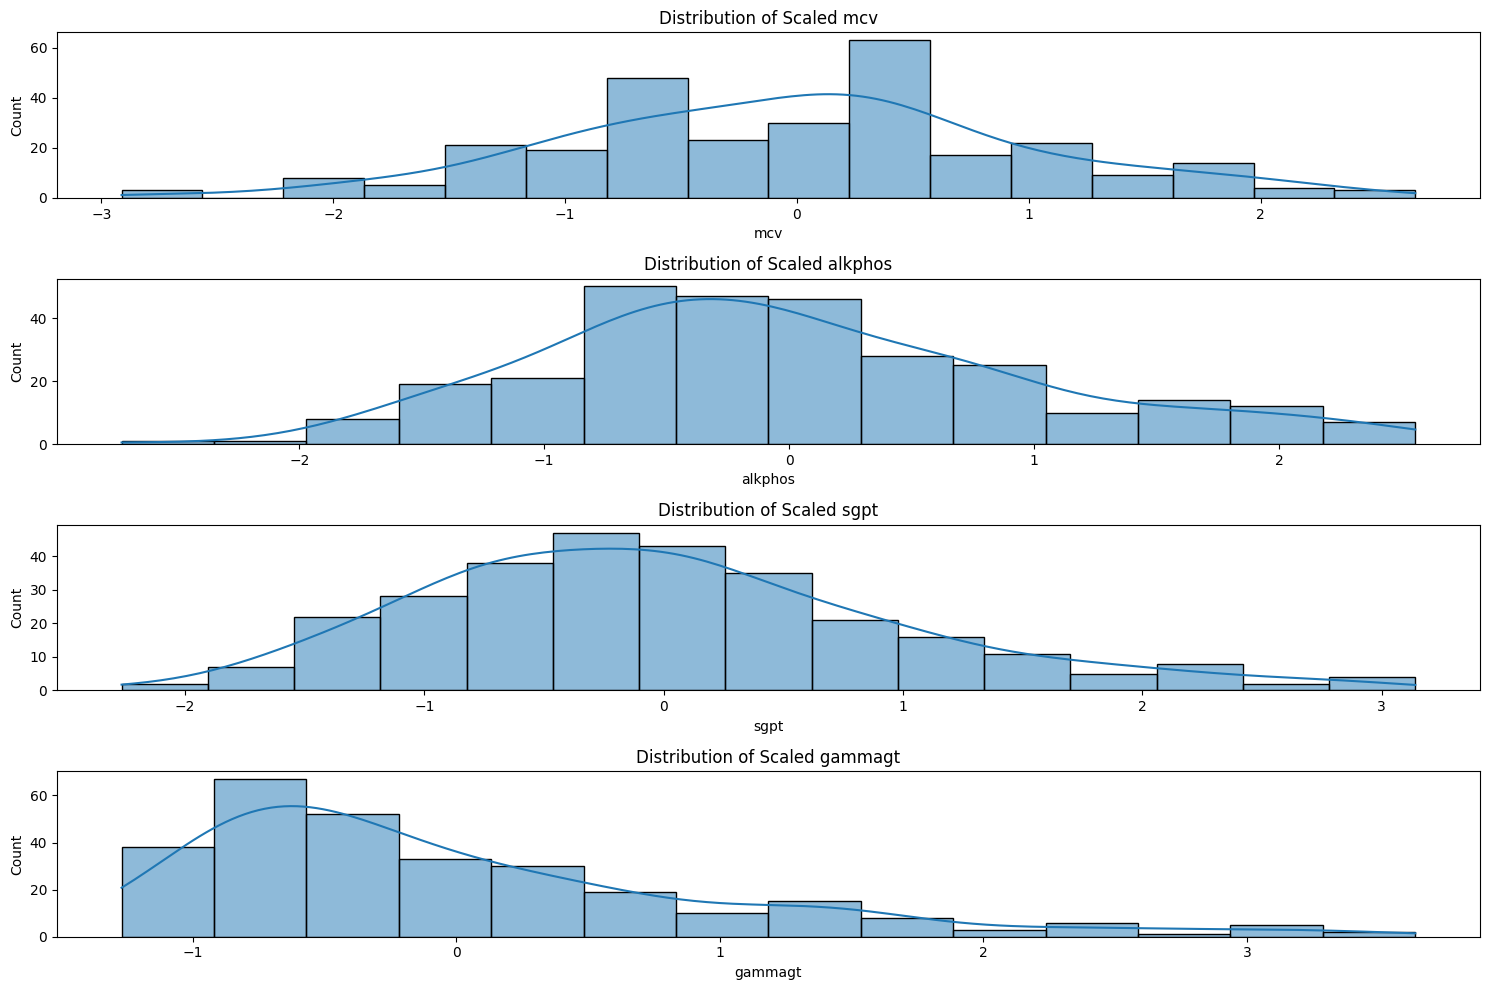

<Figure size 1500x1000 with 0 Axes>

In [62]:

def scale_data(data, features, scaler_type='standard'):
    print("\n=== Scaling Data ===")
    data_copy = data.copy()
    if scaler_type == 'standard':
        print("Using StandardScaler: zero mean, unit variance")
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        print("Using RobustScaler: resistant to outliers")
        scaler = RobustScaler()
    elif scaler_type == 'minmax':
        print("Using MinMaxScaler: scale to range [0,1]")
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
    else:
        raise ValueError("Unknown scaler type")
    data_copy[features] = scaler.fit_transform(data_copy[features])
    print("\nScaled data statistics:")
    print(data_copy[features].describe().round(2))
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i+1)
        sns.histplot(data_copy[feature], kde=True)
        plt.title(f'Distribution of Scaled {feature}')
    plt.tight_layout()
    plt.savefig(f'{dirs[0]}/scaled_features_{scaler_type}.png')
    
    return data_copy, scaler

def main() -> None:
    data = load_data()
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    data = remove_highly_correlated_features(data, threshold=0.7)
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    X = data.drop(columns=['selector','id', 'drinks'])
    y = data['drinks']
    results, combined_rankings = compare_feature_selection_methods(X, y)
    combined_rankings.to_csv(f'{dirs[0]}/feature_selection_results.csv')
    print("\nFeature selection results saved.")
    print("Results can be found in the 'results' directory.")
    print("=== Feature Selection and Comparison Completed ===")
    features= ['mcv', 'alkphos', 'sgpt', 'gammagt']
    X_clean = detect_outliers(X, features, method='iqr', visualize=True, clean_outliers=True)
    X_scaled, scaler = scale_data(X_clean, features, scaler_type='standard')
    plt.figure(figsize=(15, 10))

if __name__ == "__main__":
    main()

## 2- supervise part

Loading and preparing the data...
Dataset loaded: 345 rows and 8 columns

=== Removing Highly Correlated Features ===
Found 1 highly correlated feature pairs (>0.7):
  sgpt and sgot: 0.7397
Features to be removed: ['sgot']
Remaining features: ['mcv', 'alkphos', 'sgpt', 'gammagt']

=== Comparing Feature Selection Methods ===

Evaluating method: random_forest

=== Detecting Important Features using Random Forest ===
Using RandomForestRegressor for regression task

Feature importance ranking:
  gammagt: 0.3071
  alkphos: 0.2492
  sgpt: 0.2306
  mcv: 0.2131

Evaluating method: mutual_info

=== Detecting Important Features using Mutual Info ===
Using mutual_info_regression for regression task

Feature importance ranking:
  gammagt: 0.1143
  sgpt: 0.0551
  mcv: 0.0495
  alkphos: 0.0000

Evaluating method: lasso

=== Detecting Important Features using Lasso ===
Using Lasso Regression for feature selection

Feature importance ranking:
  gammagt: 0.8691
  mcv: 0.8155
  alkphos: 0.1660
  sgpt: 0

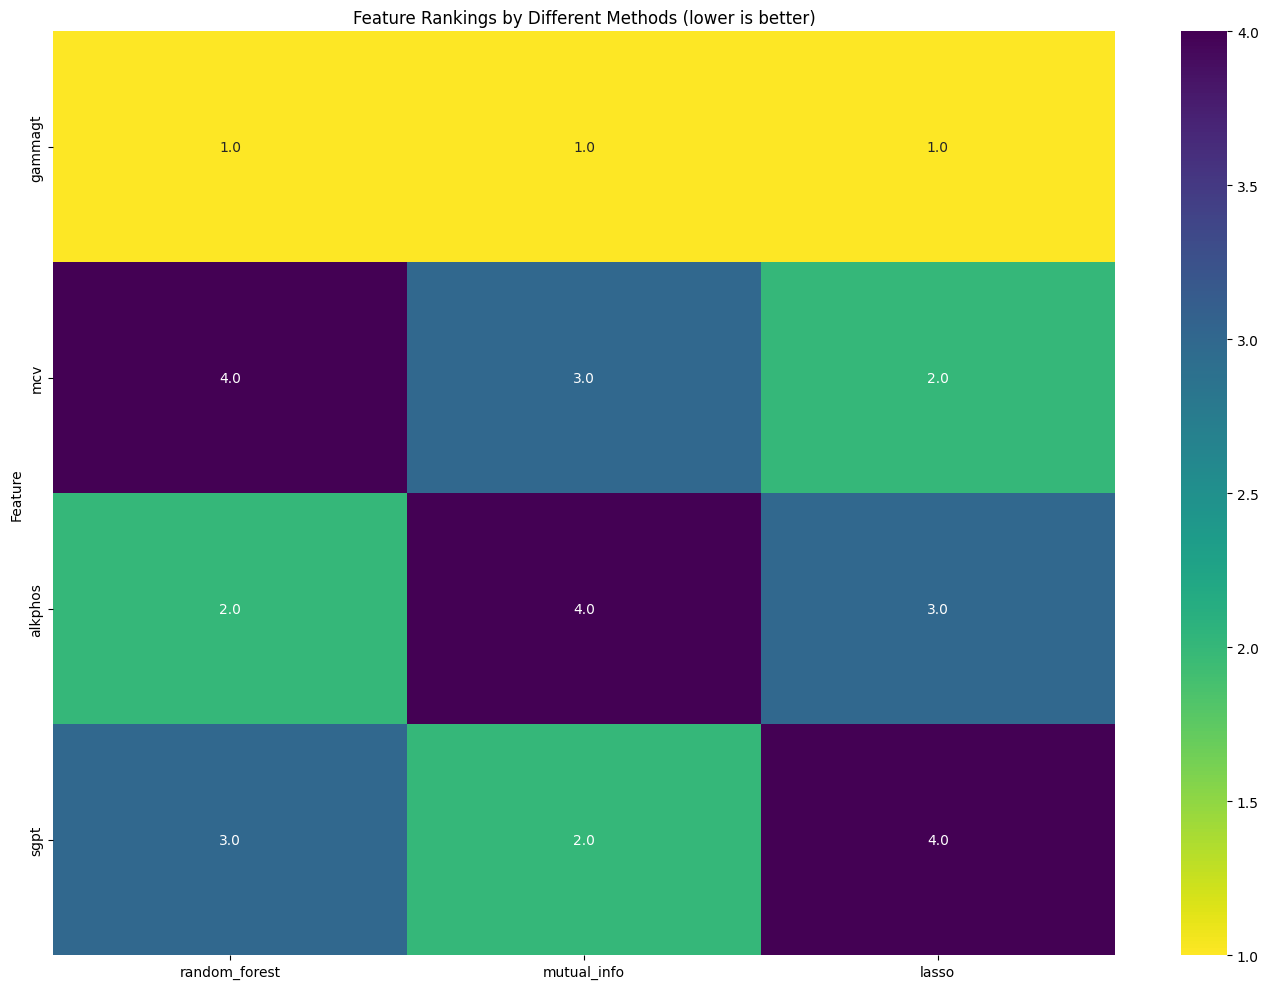

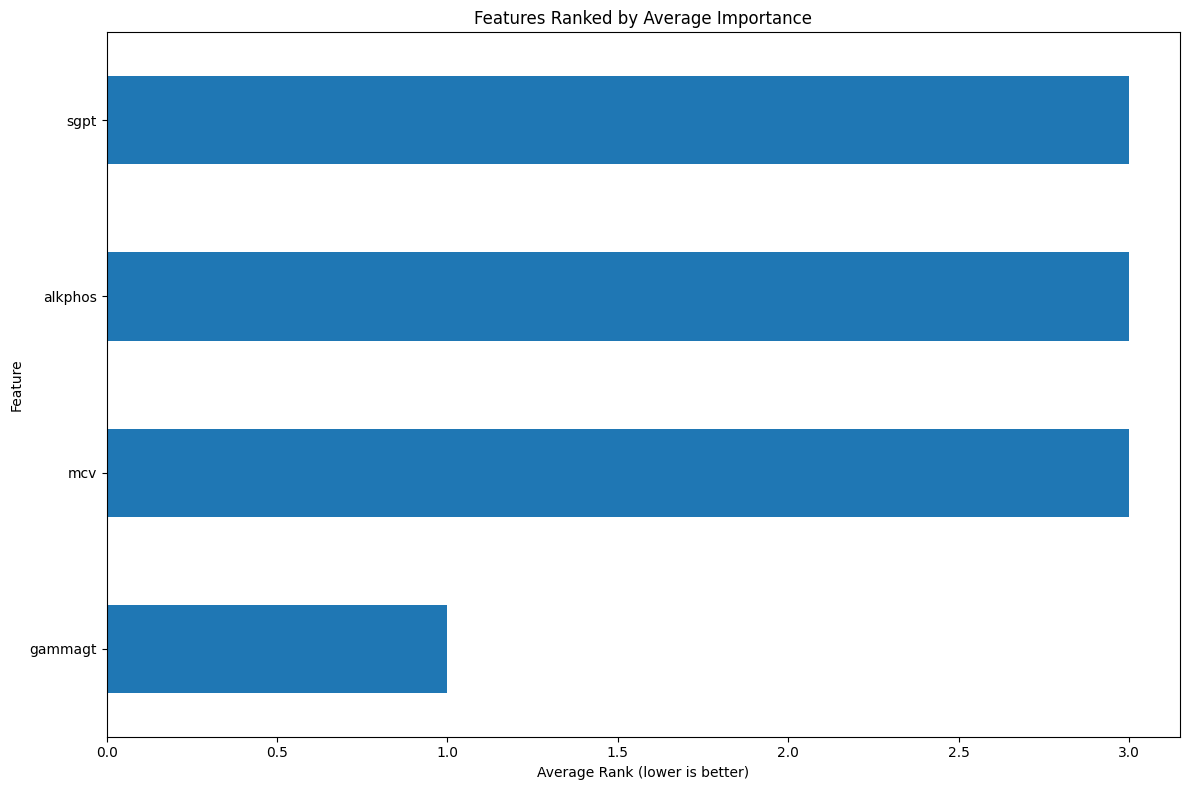

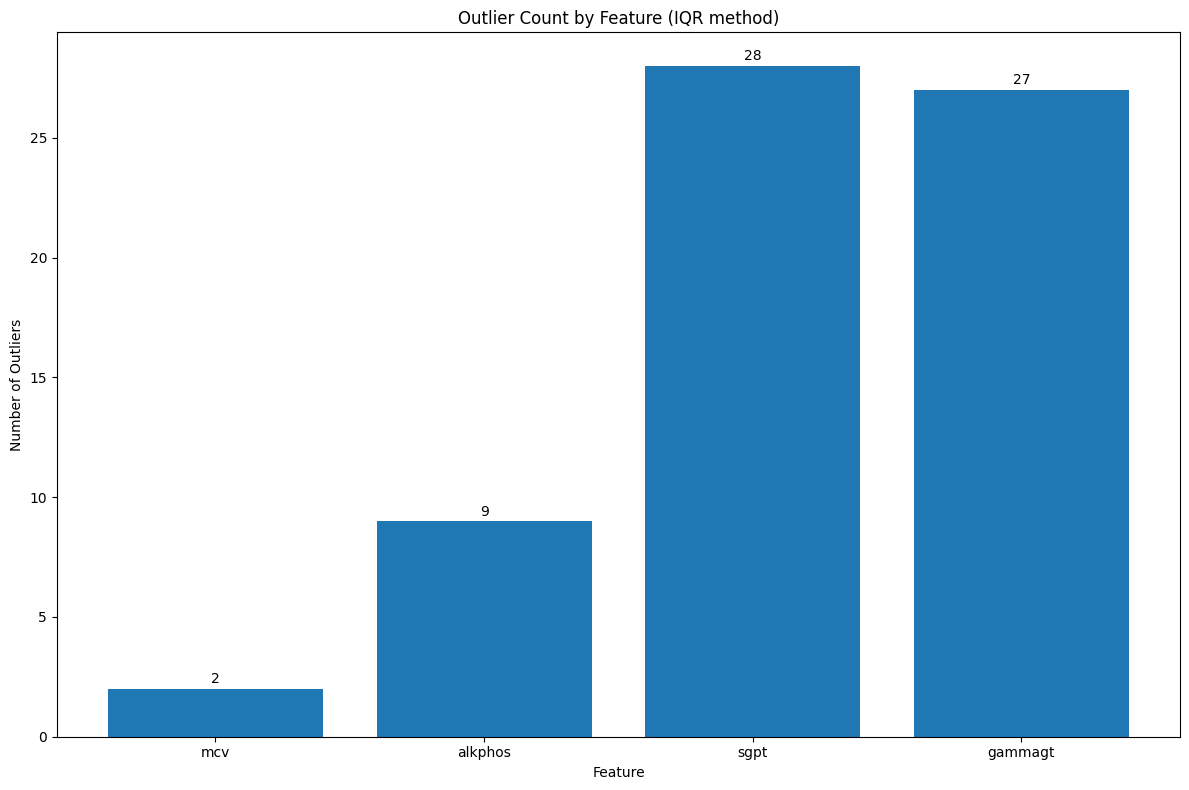

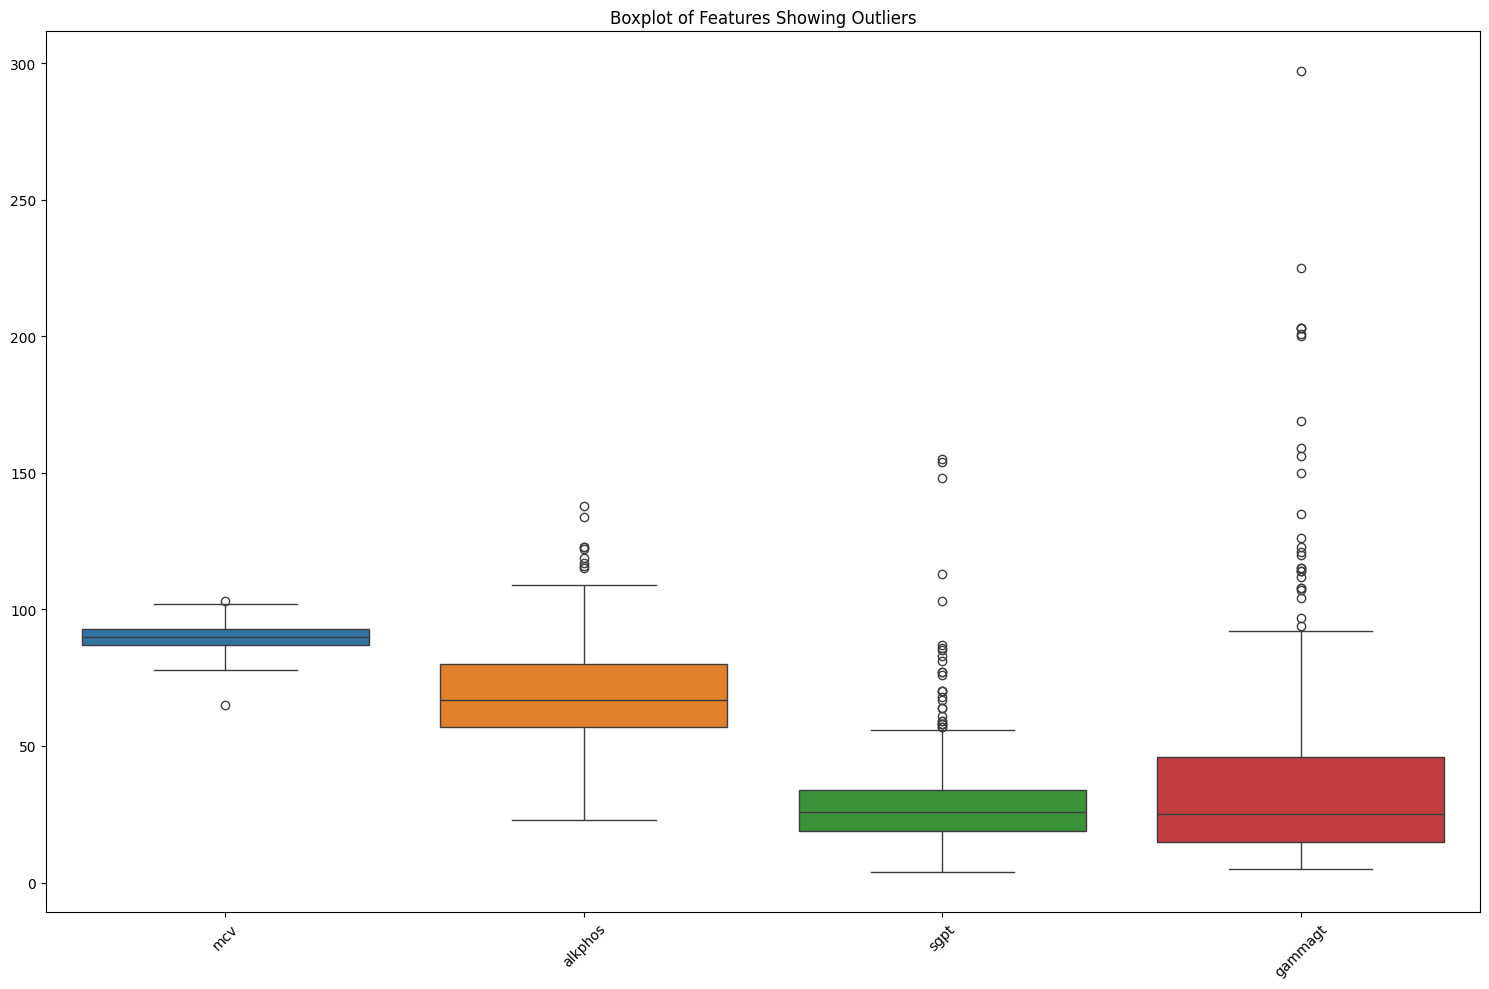

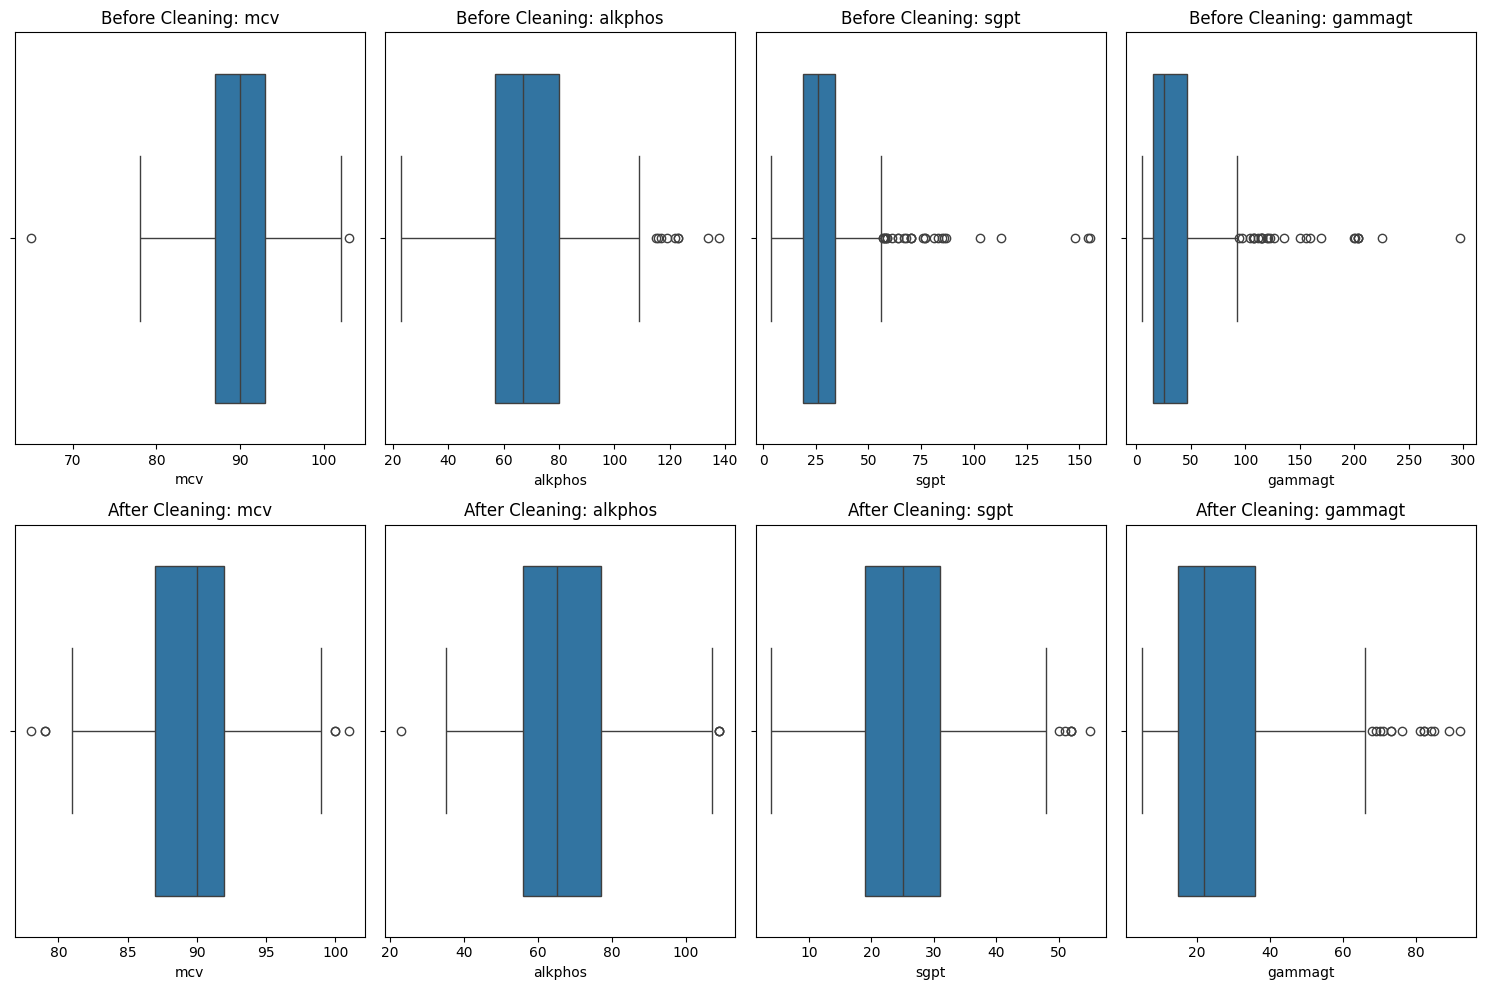

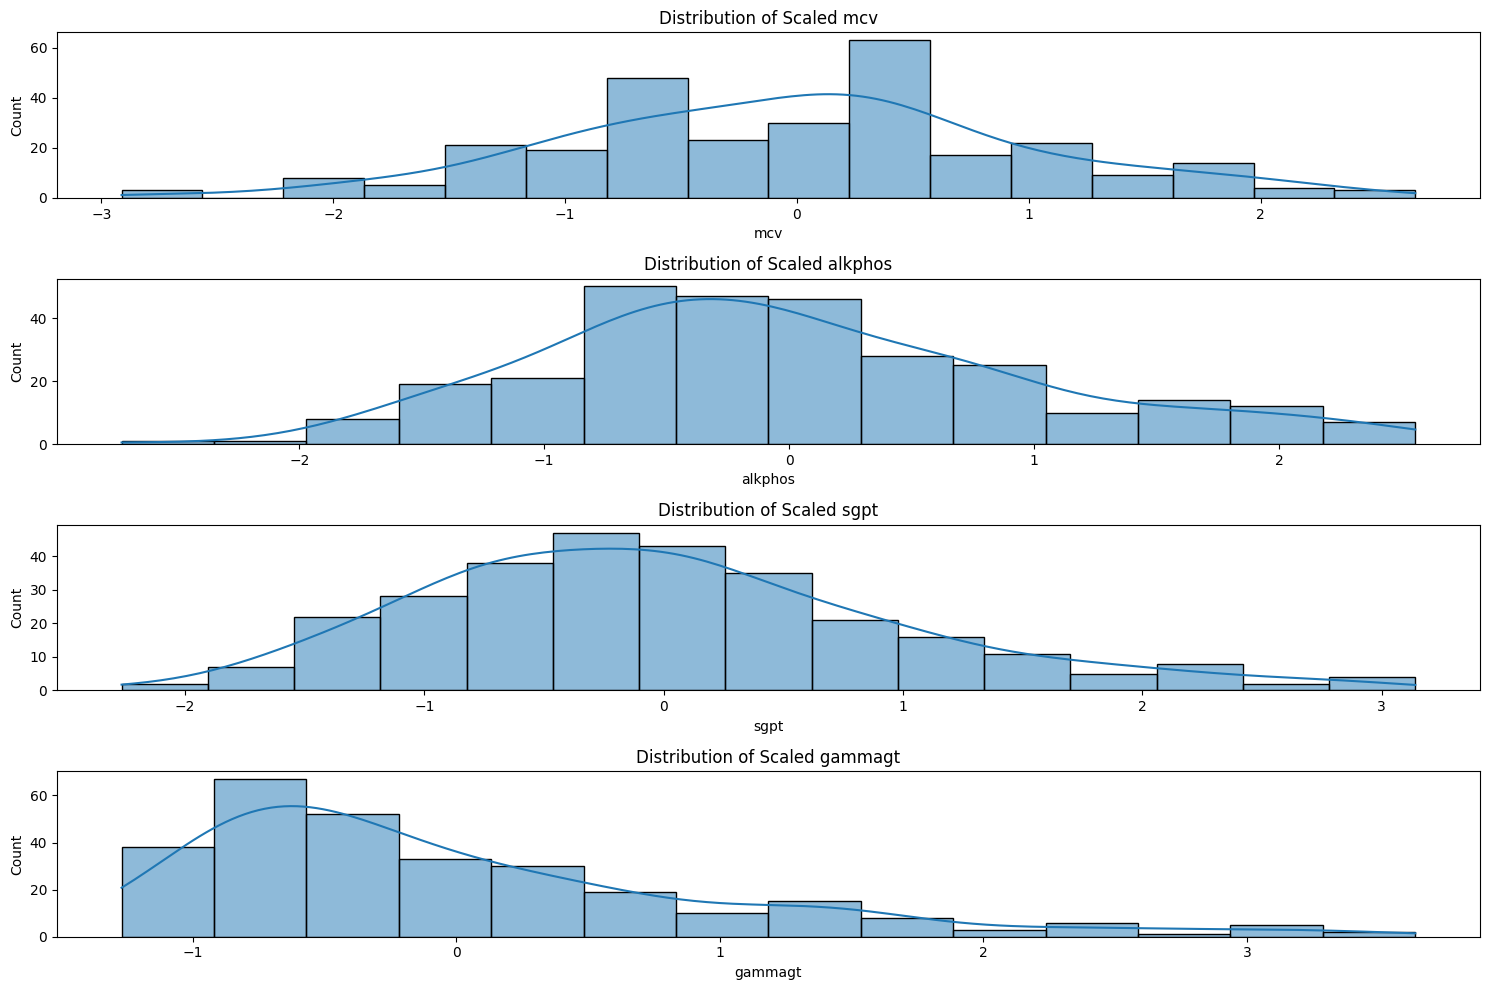

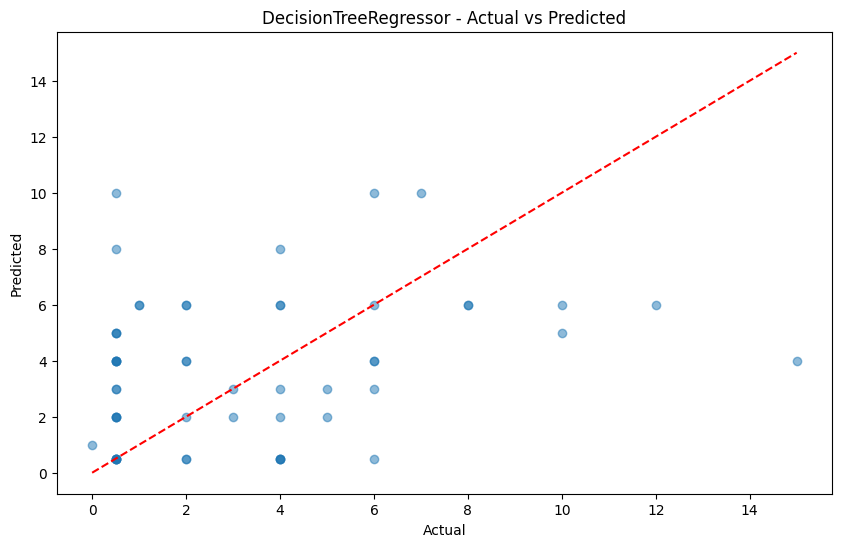

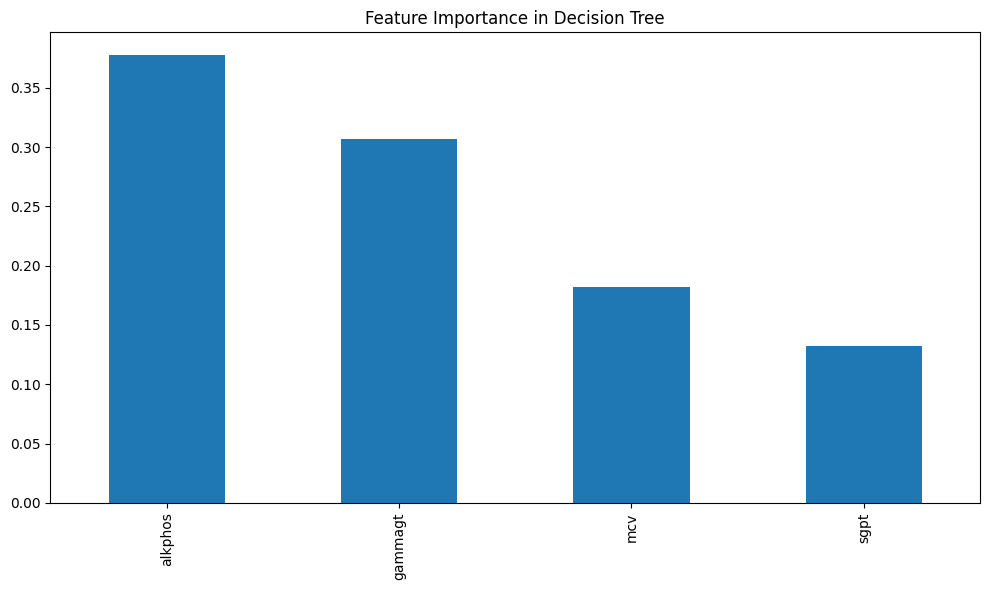

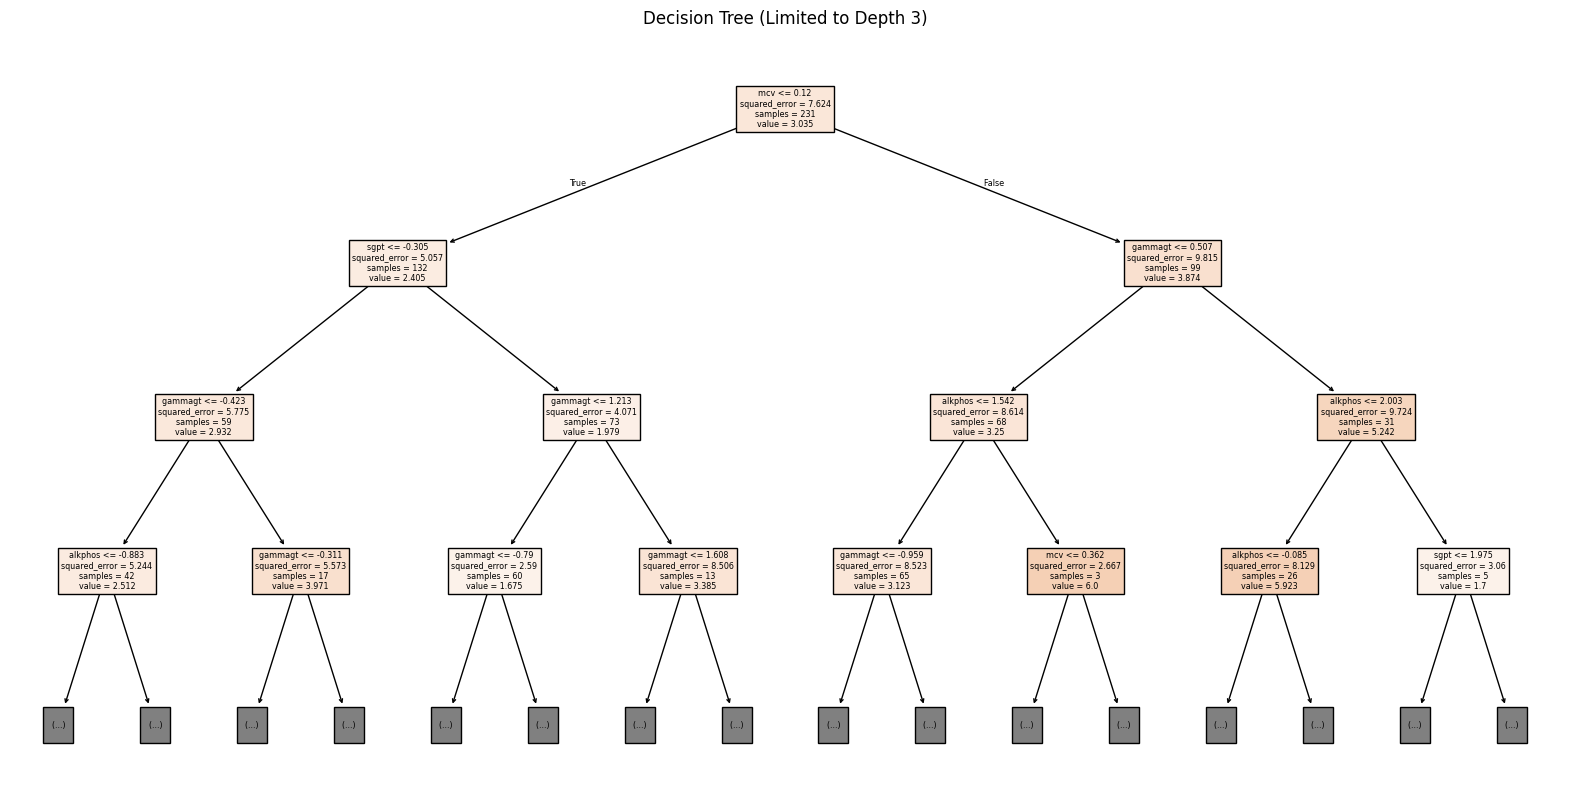

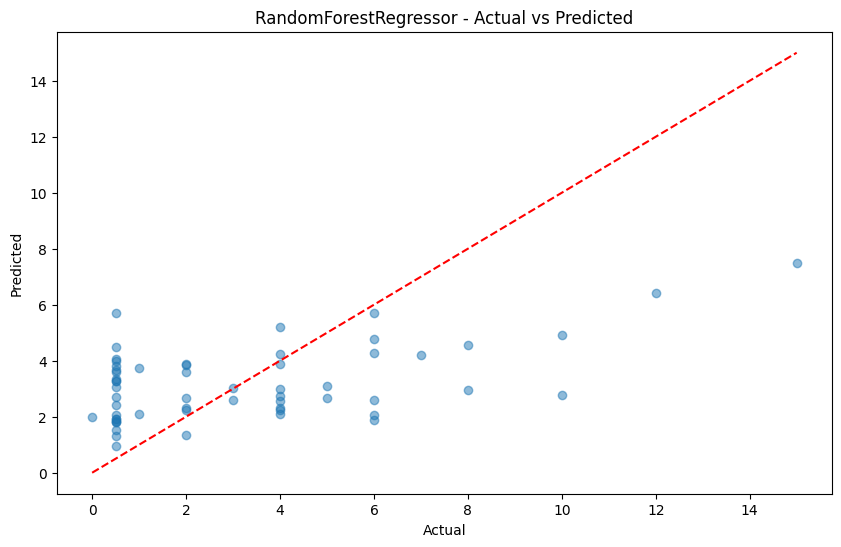

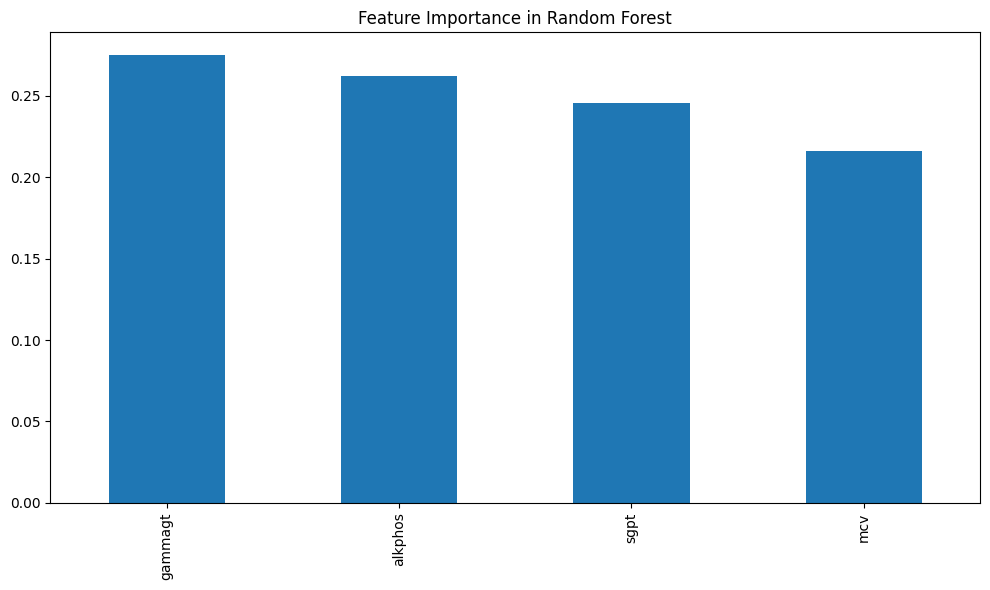

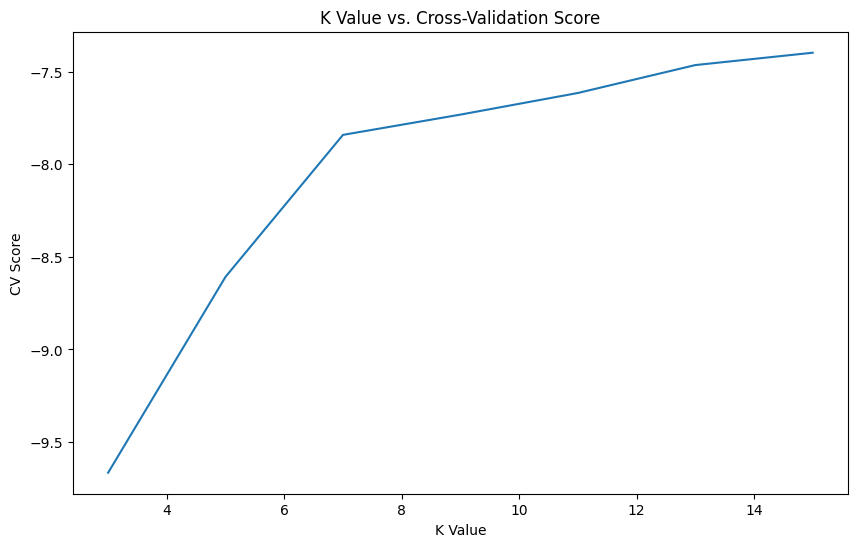

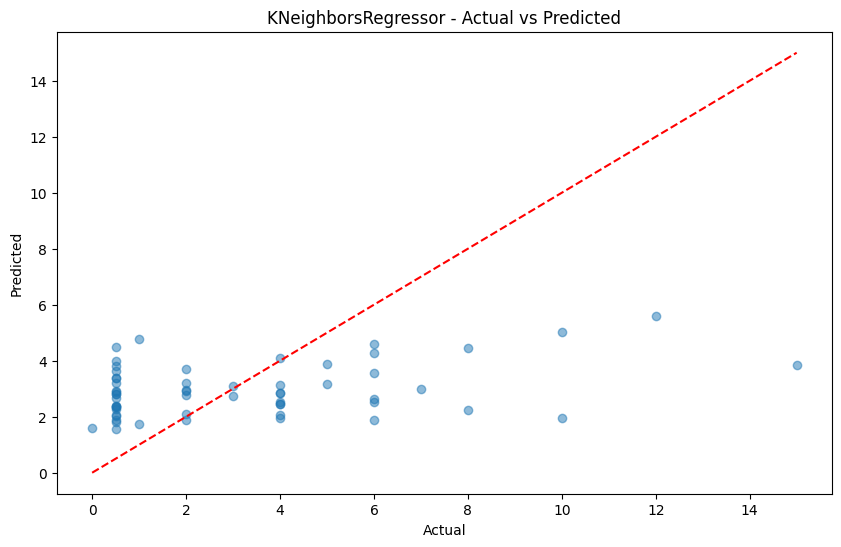

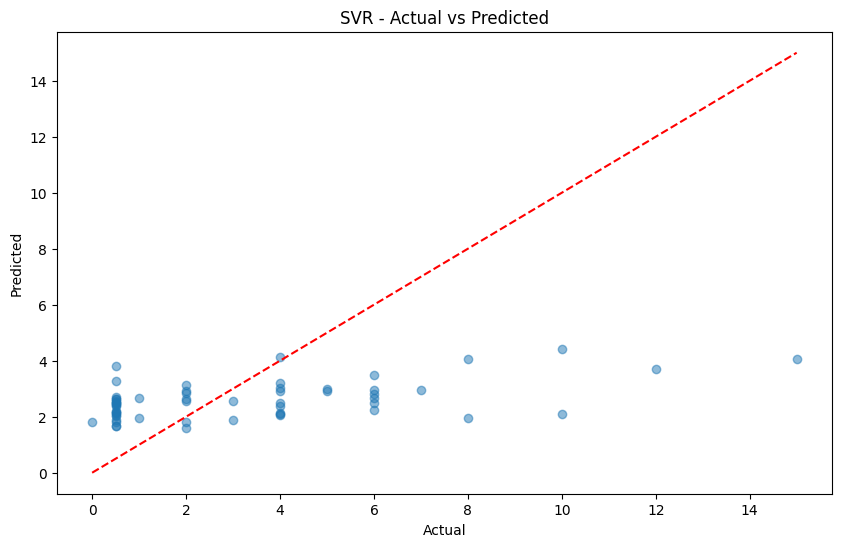

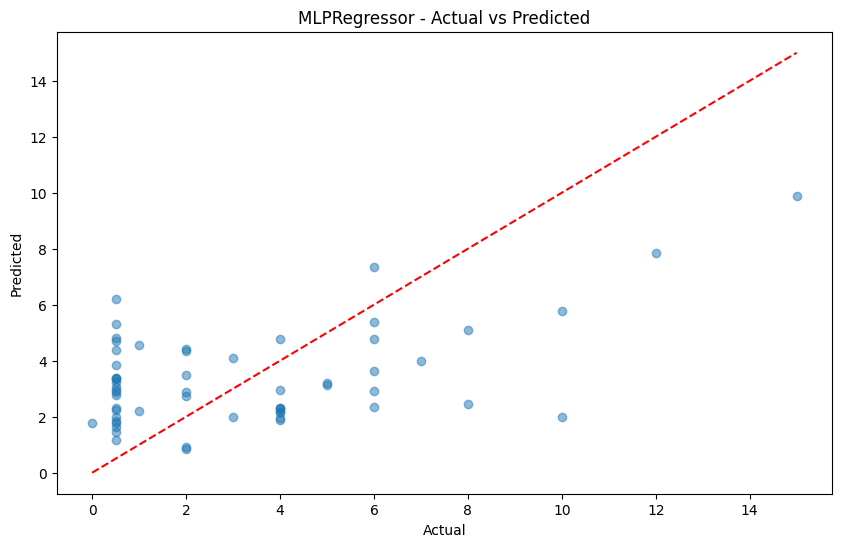

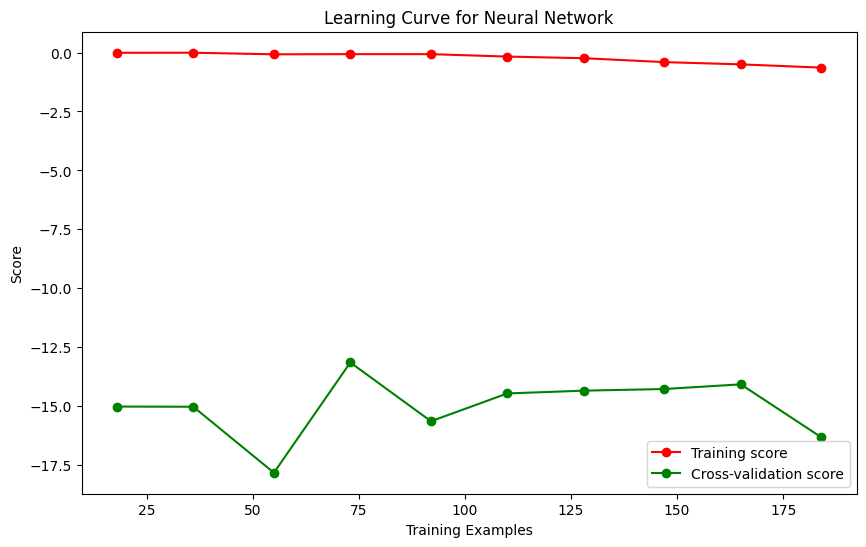

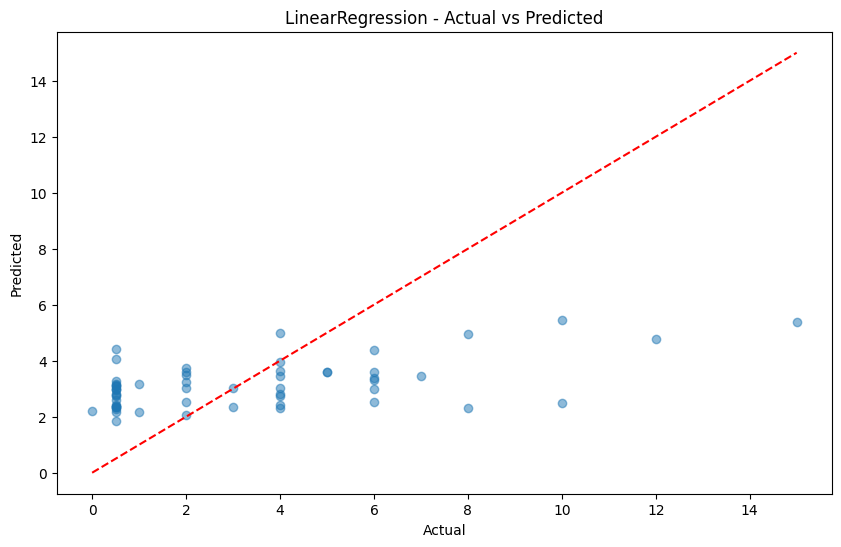

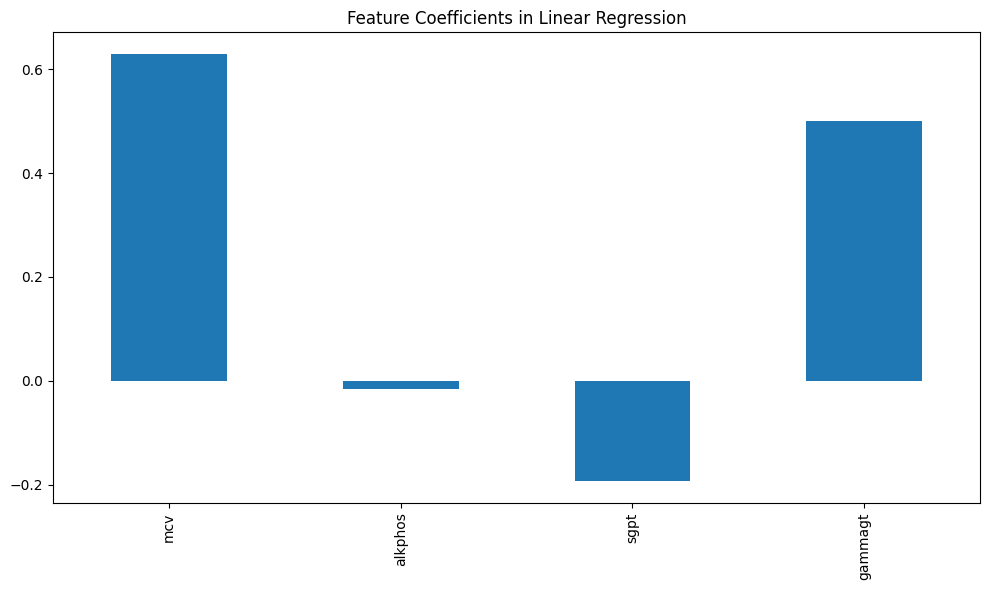

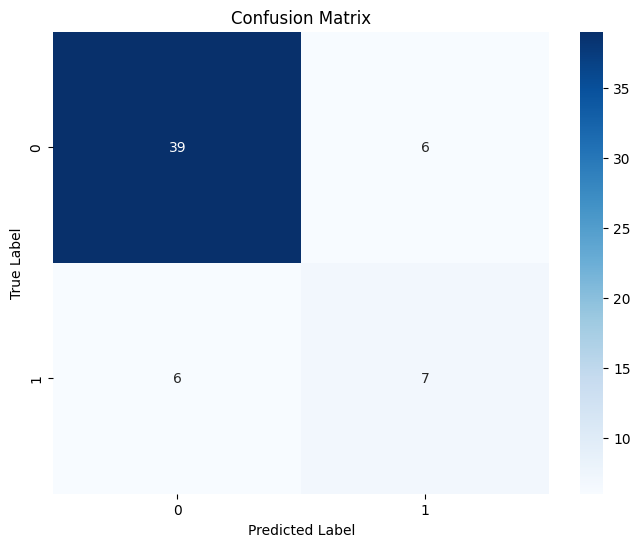

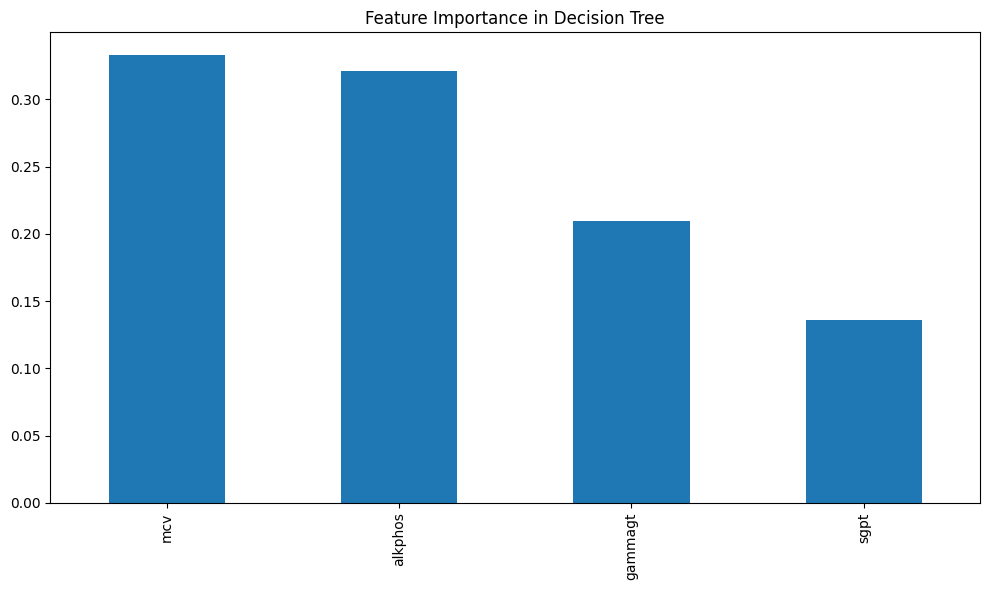

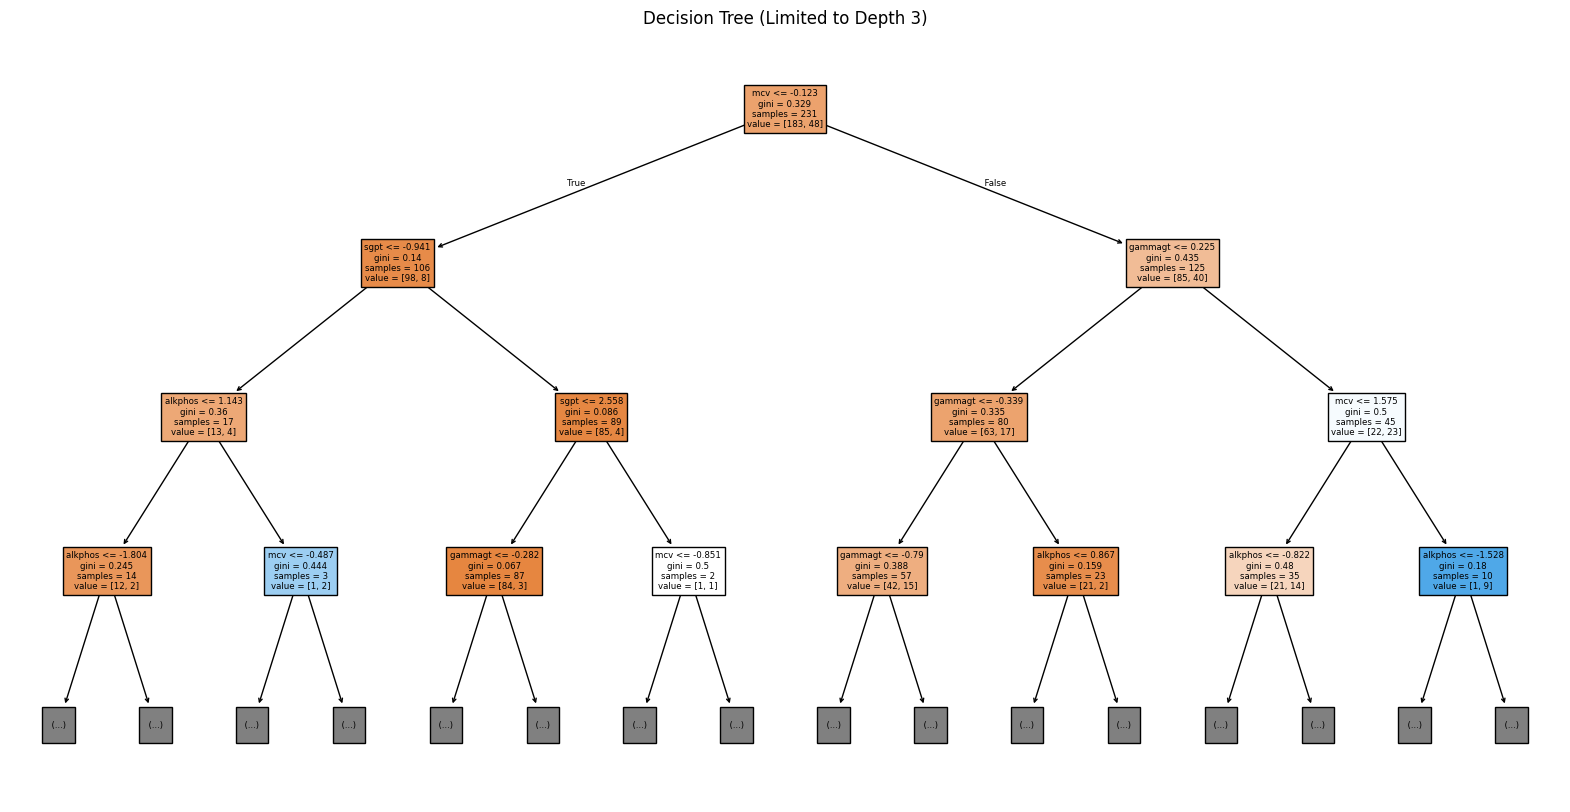

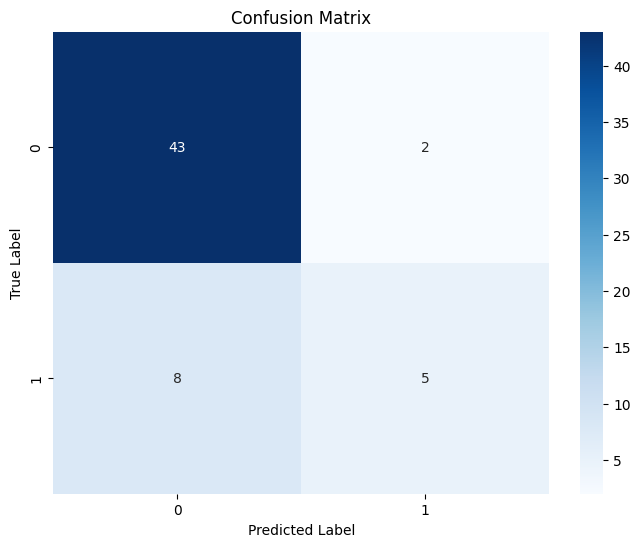

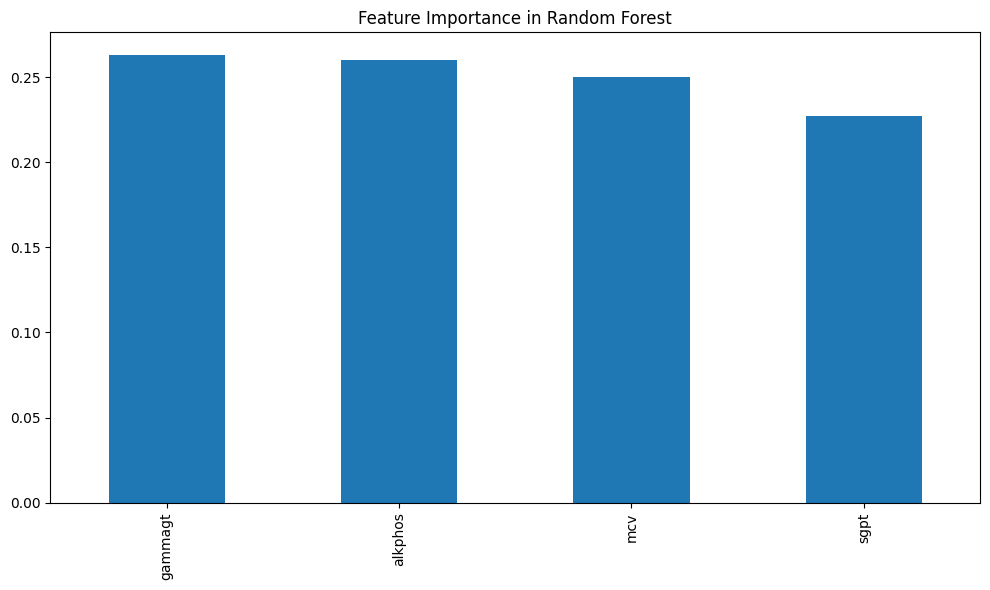

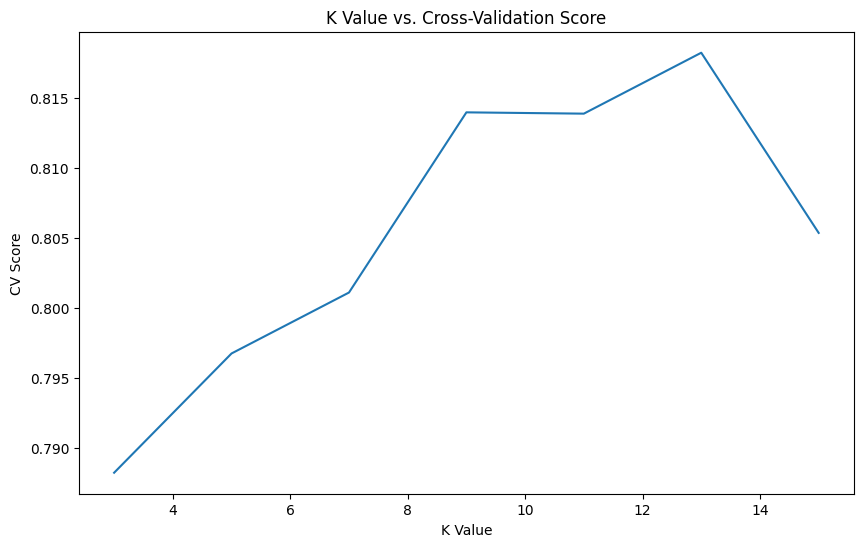

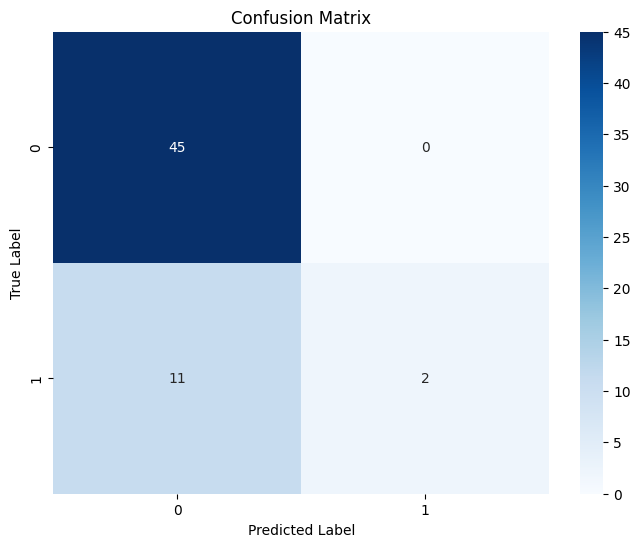

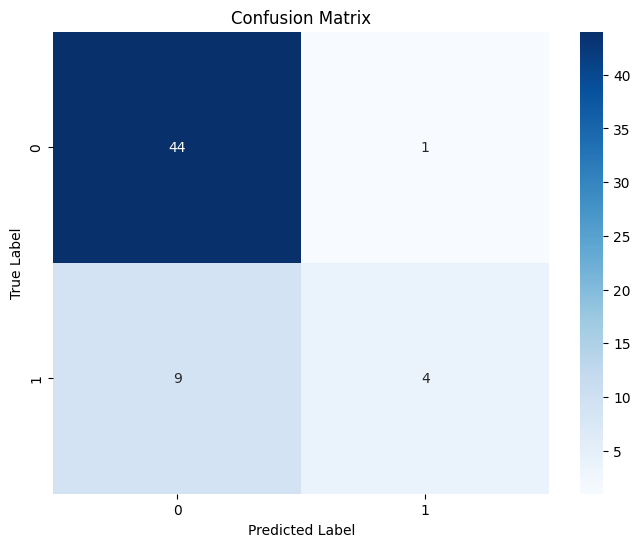

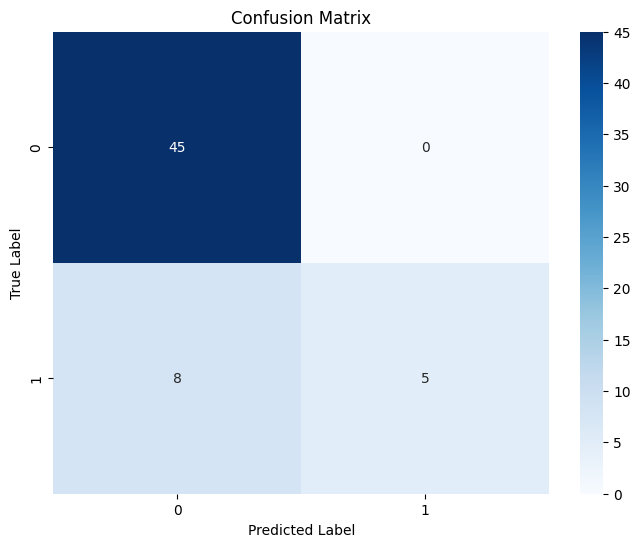

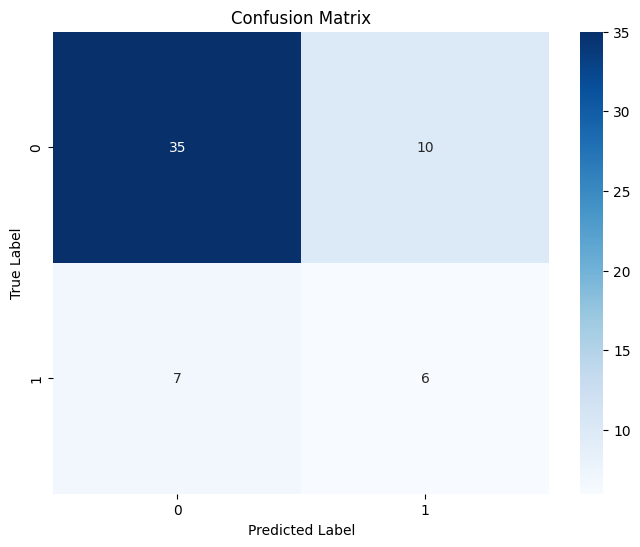

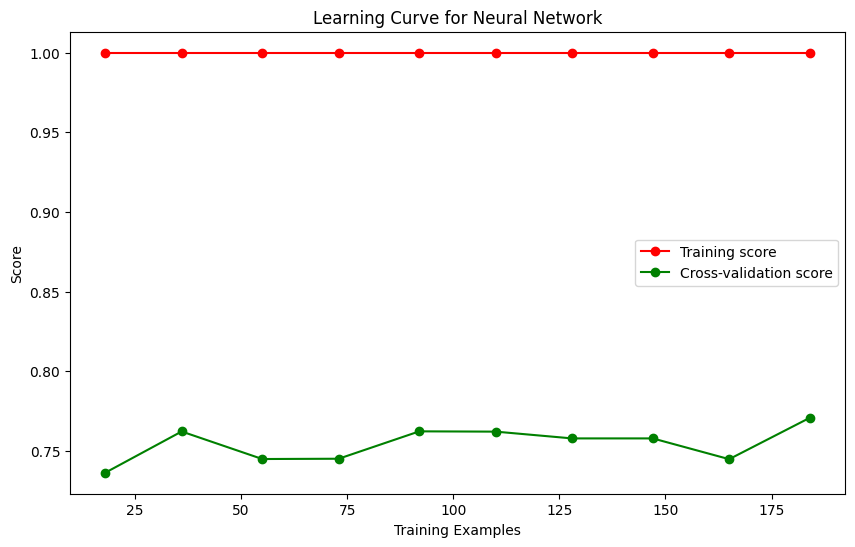

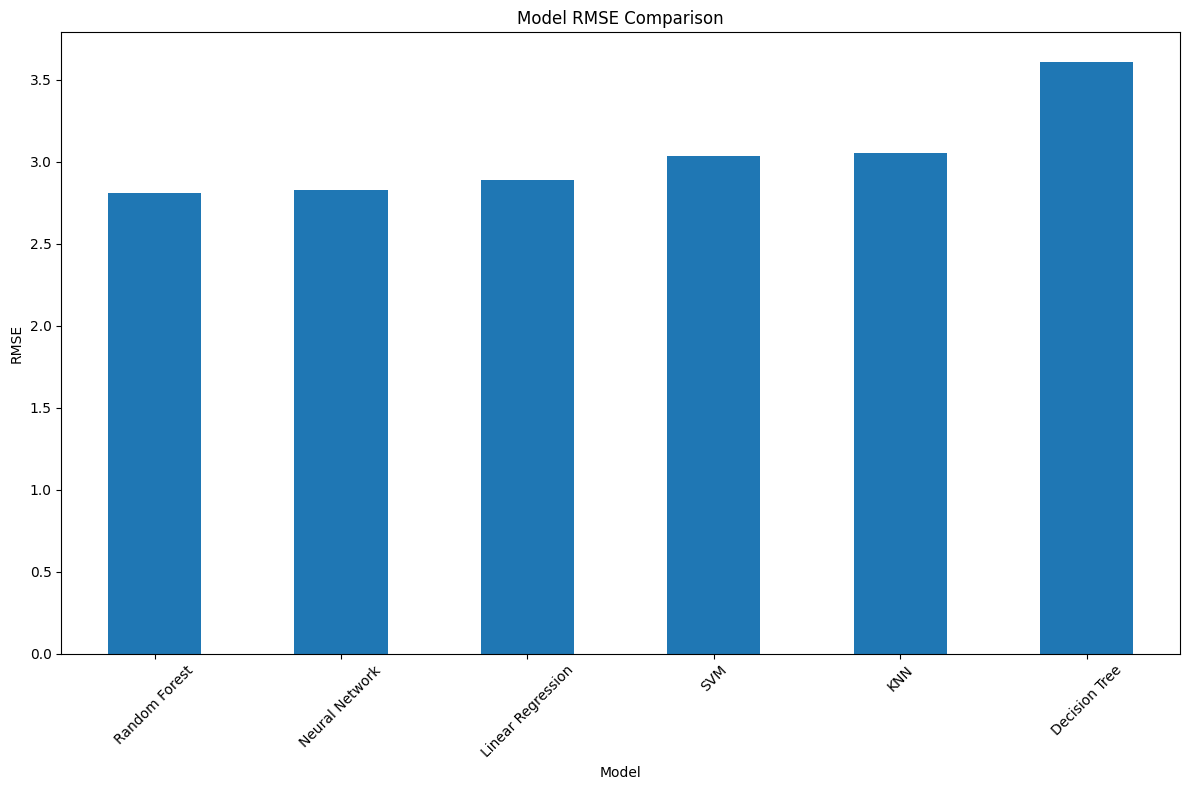

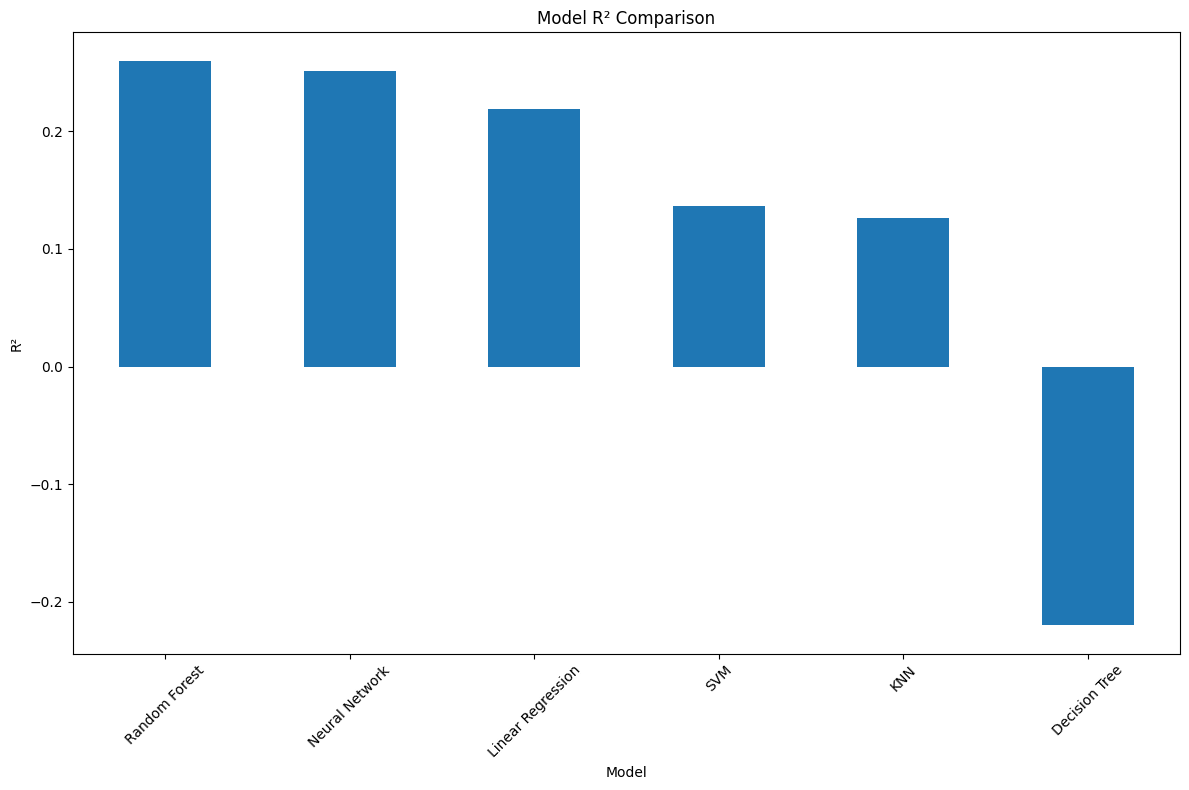

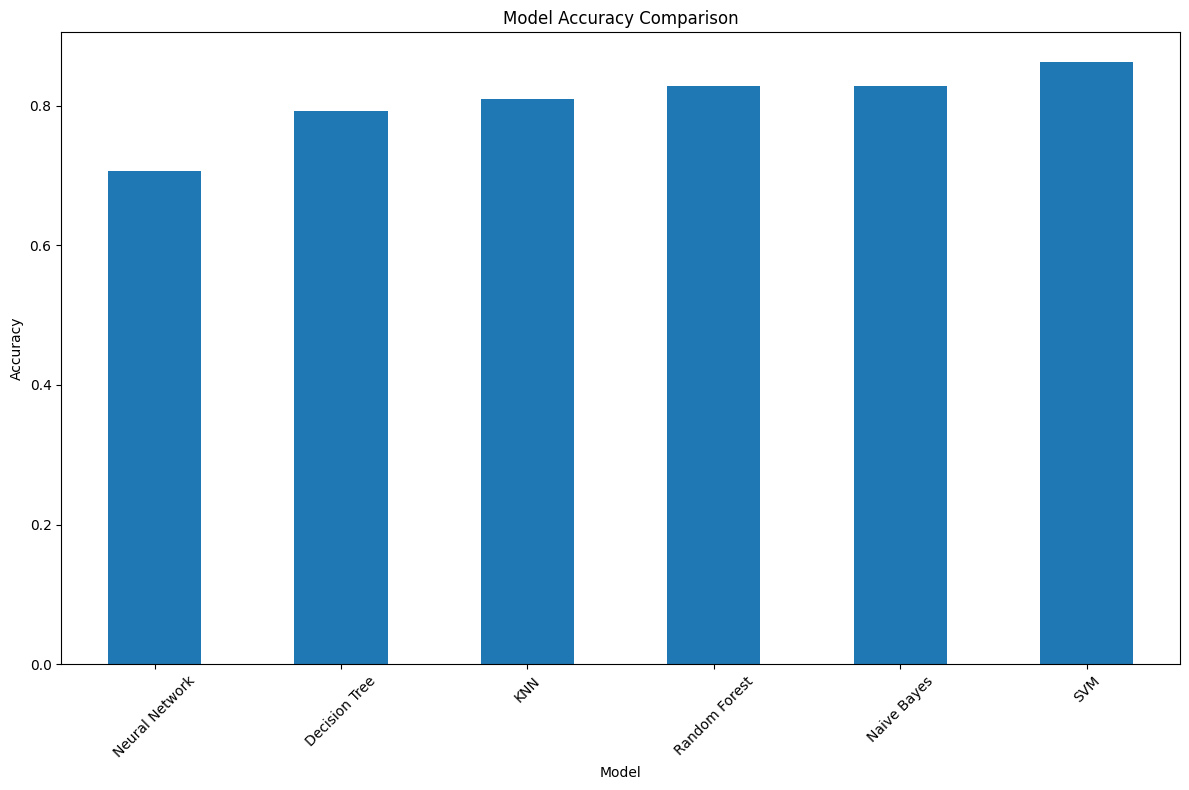

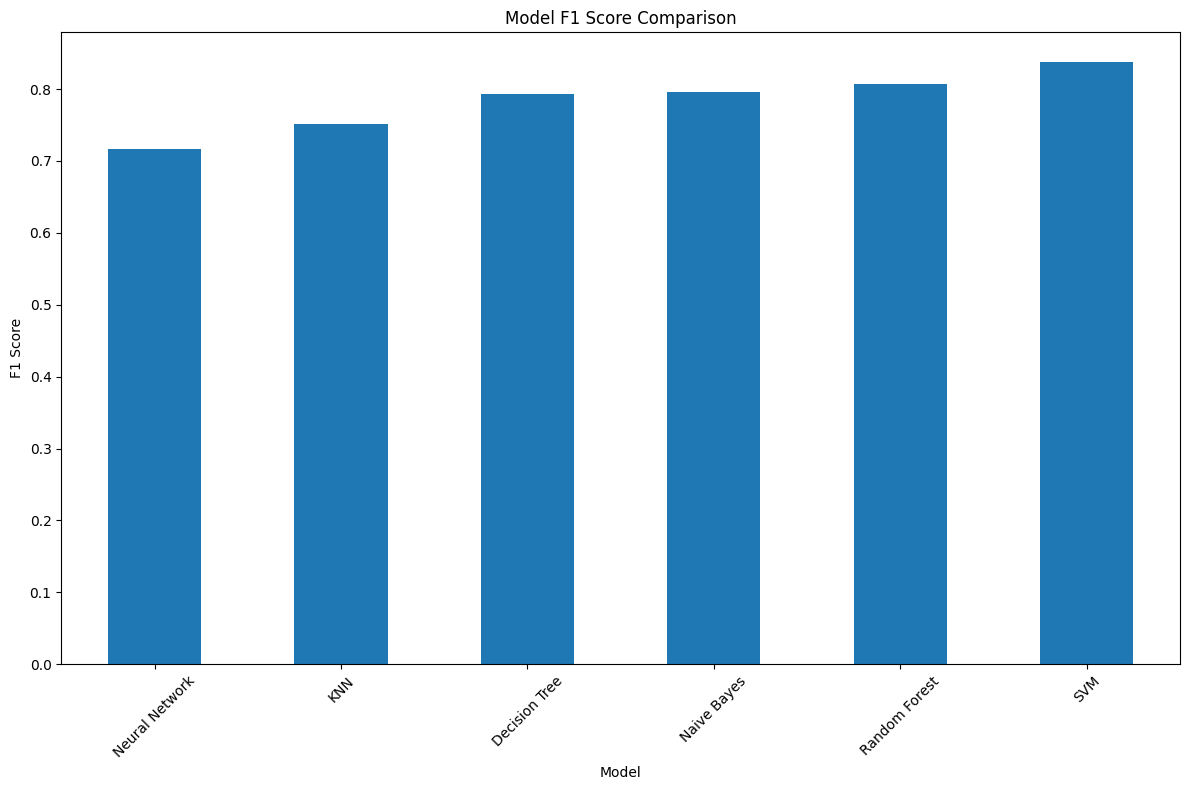

In [65]:
def train_test_split_data(X, y, test_size=0.2, random_state=42):
    print("\n=== Splitting Data into Train and Test Sets ===")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_test, y_test, task_type='classification'):
    if task_type == 'classification':
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.savefig(f'{dirs[0]}/{model.__class__.__name__}_confusion_matrix.png')
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    elif task_type == 'regression':
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        
        # Actual vs Predicted Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model.__class__.__name__} - Actual vs Predicted')
        plt.savefig(f'{dirs[0]}/{model.__class__.__name__}_regression_plot.png')
        
        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }

def perform_cross_validation(model, X, y, task_type='classification', cv=5):
    if task_type == 'classification':
        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    else:  # regression
        scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
    
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    
    print(f"\n=== {model.__class__.__name__} Cross-Validation Results ({cv}-fold) ===")
    if task_type == 'classification':
        print(f"Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
        print(f"Precision: {scores['test_precision_weighted'].mean():.4f} ± {scores['test_precision_weighted'].std():.4f}")
        print(f"Recall: {scores['test_recall_weighted'].mean():.4f} ± {scores['test_recall_weighted'].std():.4f}")
        print(f"F1 Score: {scores['test_f1_weighted'].mean():.4f} ± {scores['test_f1_weighted'].std():.4f}")
        return {
            'accuracy': scores['test_accuracy'].mean(),
            'precision': scores['test_precision_weighted'].mean(),
            'recall': scores['test_recall_weighted'].mean(),
            'f1': scores['test_f1_weighted'].mean()
        }
    else:  # regression
        print(f"MSE: {-scores['test_neg_mean_squared_error'].mean():.4f} ± {scores['test_neg_mean_squared_error'].std():.4f}")
        print(f"MAE: {-scores['test_neg_mean_absolute_error'].mean():.4f} ± {scores['test_neg_mean_absolute_error'].std():.4f}")
        print(f"R²: {scores['test_r2'].mean():.4f} ± {scores['test_r2'].std():.4f}")
        return {
            'mse': -scores['test_neg_mean_squared_error'].mean(),
            'mae': -scores['test_neg_mean_absolute_error'].mean(),
            'r2': scores['test_r2'].mean()
        }

def run_decision_tree(X_train, X_test, y_train, y_test, task_type='classification'):
    print("\n=== Decision Tree ===")
    if task_type == 'classification':
        model = DecisionTreeClassifier(random_state=42)
    else:  # regression
        model = DecisionTreeRegressor(random_state=42)
    
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, task_type)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    importances = importances.sort_values(ascending=False)
    importances.plot(kind='bar')
    plt.title('Feature Importance in Decision Tree')
    plt.tight_layout()
    plt.savefig(f'{dirs[0]}/decision_tree_feature_importance.png')
    
    # Plot tree (limited depth for visibility)
    plt.figure(figsize=(20, 10))
    tree.plot_tree(model, feature_names=X_train.columns, filled=True, max_depth=3)
    plt.title('Decision Tree (Limited to Depth 3)')
    plt.savefig(f'{dirs[0]}/decision_tree_visualization.png')
    
    return model, results

def run_random_forest(X_train, X_test, y_train, y_test, task_type='classification'):
    print("\n=== Random Forest ===")
    if task_type == 'classification':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:  # regression
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, task_type)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    importances = importances.sort_values(ascending=False)
    importances.plot(kind='bar')
    plt.title('Feature Importance in Random Forest')
    plt.tight_layout()
    plt.savefig(f'{dirs[0]}/random_forest_feature_importance.png')
    
    return model, results

def run_knn(X_train, X_test, y_train, y_test, task_type='classification'):
    print("\n=== K-Nearest Neighbors ===")
    if task_type == 'classification':
        model = KNeighborsClassifier()
    else:  # regression
        model = KNeighborsRegressor()
    
    # Find optimal K value
    k_values = [3, 5, 7, 9, 11, 13, 15]
    cv_scores = []
    
    for k in k_values:
        if task_type == 'classification':
            knn = KNeighborsClassifier(n_neighbors=k)
        else:  # regression
            knn = KNeighborsRegressor(n_neighbors=k)
        
        if task_type == 'classification':
            scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        else:  # regression
            scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        cv_scores.append(scores.mean())
    
    # Plot K vs. CV Score
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, cv_scores)
    plt.xlabel('K Value')
    plt.ylabel('CV Score')
    plt.title('K Value vs. Cross-Validation Score')
    plt.savefig(f'{dirs[0]}/knn_k_optimization.png')
    
    # Get optimal K
    optimal_k = k_values[np.argmax(cv_scores)]
    print(f"Optimal K value: {optimal_k}")
    
    # Train with optimal K
    if task_type == 'classification':
        model = KNeighborsClassifier(n_neighbors=optimal_k)
    else:  # regression
        model = KNeighborsRegressor(n_neighbors=optimal_k)
    
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, task_type)
    
    return model, results

def run_naive_bayes(X_train, X_test, y_train, y_test):
    print("\n=== Naive Bayes ===")
    # Note: Naive Bayes is primarily a classification algorithm
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, 'classification')
    
    return model, results

def run_svm(X_train, X_test, y_train, y_test, task_type='classification'):
    print("\n=== Support Vector Machine ===")
    if task_type == 'classification':
        model = SVC(kernel='rbf', probability=True, random_state=42)
    else:  # regression
        model = SVR(kernel='rbf')
    
    # Parameter optimization with grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 'scale', 'auto']
    }
    
    grid_search = GridSearchCV(model, param_grid, cv=5, 
                               scoring='accuracy' if task_type == 'classification' else 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(best_model, X_test, y_test, task_type)
    
    return best_model, results

def run_neural_network(X_train, X_test, y_train, y_test, task_type='classification'):
    print("\n=== Neural Network ===")
    if task_type == 'classification':
        model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    else:  # regression
        model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, task_type)
    
    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, 
        scoring='accuracy' if task_type == 'classification' else 'neg_mean_squared_error', 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve for Neural Network')
    plt.legend(loc='best')
    plt.savefig(f'{dirs[0]}/neural_network_learning_curve.png')
    
    return model, results

def run_linear_regression(X_train, X_test, y_train, y_test):
    print("\n=== Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    print("Model performance on test set:")
    results = evaluate_model(model, X_test, y_test, 'regression')
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    coefs = pd.Series(model.coef_, index=X_train.columns)
    coefs.plot(kind='bar')
    plt.title('Feature Coefficients in Linear Regression')
    plt.tight_layout()
    plt.savefig(f'{dirs[0]}/linear_regression_coefficients.png')
    
    return model, results

def compare_models(all_results, task_type='classification'):
    print("\n=== Model Comparison ===")
    
    if task_type == 'classification':
        # Create comparison DataFrame
        results_df = pd.DataFrame(all_results).T
        
        # Plot accuracy comparison
        plt.figure(figsize=(12, 8))
        results_df['accuracy'].sort_values().plot(kind='bar')
        plt.title('Model Accuracy Comparison')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/model_accuracy_comparison.png')
        
        # Plot F1 score comparison
        plt.figure(figsize=(12, 8))
        results_df['f1'].sort_values().plot(kind='bar')
        plt.title('Model F1 Score Comparison')
        plt.xlabel('Model')
        plt.ylabel('F1 Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/model_f1_comparison.png')
        
    else:  # regression
        # Create comparison DataFrame
        results_df = pd.DataFrame(all_results).T
        
        # Plot RMSE comparison
        plt.figure(figsize=(12, 8))
        rmse_values = [np.sqrt(results_df['mse'][i]) for i in results_df.index]
        results_df['rmse'] = rmse_values
        results_df['rmse'].sort_values().plot(kind='bar')
        plt.title('Model RMSE Comparison')
        plt.xlabel('Model')
        plt.ylabel('RMSE')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/model_rmse_comparison.png')
        
        # Plot R2 comparison
        plt.figure(figsize=(12, 8))
        results_df['r2'].sort_values(ascending=False).plot(kind='bar')
        plt.title('Model R² Comparison')
        plt.xlabel('Model')
        plt.ylabel('R²')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'{dirs[0]}/model_r2_comparison.png')
    
    return results_df

def prepare_classification_data(y, threshold=5):
    # Convert regression problem to classification by thresholding
    # For example, if drinks > threshold, classify as heavy drinker (1), else light drinker (0)
    print(f"\n=== Converting to Classification Problem (threshold={threshold}) ===")
    y_class = (y > threshold).astype(int)
    print(f"Class distribution: {pd.Series(y_class).value_counts().to_dict()}")
    return y_class

def main() -> None:
    # Set up directories
    dirs = ['results']  # Define dirs here to avoid reference before assignment
    for dir_name in dirs:
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
            
    # Load and prepare data
    data = load_data()
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    
    # Remove highly correlated features
    data = remove_highly_correlated_features(data, threshold=0.7)
    if isinstance(data, tuple):
        data = pd.DataFrame(data[0])
    
    # Extract features and target
    X = data.drop(columns=['selector', 'id', 'drinks'])
    y = data['drinks']
    
    # Feature selection
    results, combined_rankings = compare_feature_selection_methods(X, y)
    combined_rankings.to_csv(f'{dirs[0]}/feature_selection_results.csv')
    print("\nFeature selection results saved.")
    
    # Use selected features
    features = ['mcv', 'alkphos', 'sgpt', 'gammagt']
    X = X[features]
    
    # Handle outliers
    X_clean = detect_outliers(X, features, method='iqr', visualize=True, clean_outliers=True)
    
    # Scale data
    X_scaled, scaler = scale_data(X_clean, features, scaler_type='standard')
    
    # Prepare classification data
    y_class = prepare_classification_data(y, threshold=5)
    
    # Fix for inconsistent samples - align y with X_scaled indices
    # This ensures both X and y have the same indices and samples
    X_scaled_filtered = X_scaled.copy()  # Make a copy to avoid modifying the original
    y_filtered = y[X_scaled_filtered.index]  # Filter y to match X_scaled's indices
    y_class_filtered = y_class[X_scaled_filtered.index]  # Filter y_class to match X_scaled's indices
    
    # Split data for regression task with the aligned data
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split_data(
        X_scaled_filtered, y_filtered, test_size=0.2)
    
    # Split data for classification task with the aligned data
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split_data(
        X_scaled_filtered, y_class_filtered, test_size=0.2)
    
    # Initialize results dictionaries
    regression_results = {}
    classification_results = {}
    
    # Run regression models
    print("\n====== REGRESSION MODELS ======")
    _, reg_results = run_decision_tree(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')
    regression_results['Decision Tree'] = reg_results
    
    _, reg_results = run_random_forest(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')
    regression_results['Random Forest'] = reg_results
    
    _, reg_results = run_knn(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')
    regression_results['KNN'] = reg_results
    
    _, reg_results = run_svm(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')
    regression_results['SVM'] = reg_results
    
    _, reg_results = run_neural_network(X_train_reg, X_test_reg, y_train_reg, y_test_reg, 'regression')
    regression_results['Neural Network'] = reg_results
    
    _, reg_results = run_linear_regression(X_train_reg, X_test_reg, y_train_reg, y_test_reg)
    regression_results['Linear Regression'] = reg_results
    
    # Run classification models
    print("\n====== CLASSIFICATION MODELS ======")
    _, cls_results = run_decision_tree(X_train_cls, X_test_cls, y_train_cls, y_test_cls, 'classification')
    classification_results['Decision Tree'] = cls_results
    
    _, cls_results = run_random_forest(X_train_cls, X_test_cls, y_train_cls, y_test_cls, 'classification')
    classification_results['Random Forest'] = cls_results
    
    _, cls_results = run_knn(X_train_cls, X_test_cls, y_train_cls, y_test_cls, 'classification')
    classification_results['KNN'] = cls_results
    
    _, cls_results = run_naive_bayes(X_train_cls, X_test_cls, y_train_cls, y_test_cls)
    classification_results['Naive Bayes'] = cls_results
    
    _, cls_results = run_svm(X_train_cls, X_test_cls, y_train_cls, y_test_cls, 'classification')
    classification_results['SVM'] = cls_results
    
    _, cls_results = run_neural_network(X_train_cls, X_test_cls, y_train_cls, y_test_cls, 'classification')
    classification_results['Neural Network'] = cls_results
    
    # Compare model performance
    reg_comparison = compare_models(regression_results, 'regression')
    cls_comparison = compare_models(classification_results, 'classification')
    
    # Save comparison results
    reg_comparison.to_csv(f'{dirs[0]}/regression_model_comparison.csv')
    cls_comparison.to_csv(f'{dirs[0]}/classification_model_comparison.csv')
    
    print("\n=== Analysis Complete ===")
    print("All results and visualizations have been saved to the 'results' directory.")
    
if __name__ == "__main__":
    main()